In [3]:
#==============================================================================
# Import Libraries
#==============================================================================
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pydot
import scipy as sp
import time

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score as PS
from sklearn.metrics import recall_score as RS
from sklearn.metrics import f1_score as FS
from sklearn.decomposition import PCA
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

from imblearn.over_sampling import SMOTE

In [4]:
# Get the Data
app_data = pd.read_csv('application_data.csv')
app_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(app_data.shape)

(307511, 122)


### Data Preprocessing

In [6]:
app_data.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
app_data.agg(['count', 'size', 'nunique'])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511,307511,307511,307511,307511,307511,307511,307511,307511,307499,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
size,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,307511,307511,307511,307511,307511,307511
nunique,307511,2,2,3,2,2,15,2548,5603,13672,...,2,2,2,2,5,9,9,24,11,25


In [8]:
# Calculating the percentage of the missing data in each column
def missing_data(data):
    total = data.isnull().sum() #Total of null values in each column
    percent = (total / data.isnull().count()) * 100
    unique = data.nunique() #Unique values in entire dataset
    datatype = data.dtypes #Finding data types in entire dataset
    return pd.concat([total, percent, unique, datatype], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by = 'Percent', ascending=False)

In [9]:
metData = missing_data(app_data)
metData.head(30)

,Total,Percent,Unique,Data_Type
COMMONAREA_MEDI,214865,69.872297,3202,float64
COMMONAREA_AVG,214865,69.872297,3181,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,386,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.432963,214,float64
FONDKAPREMONT_MODE,210295,68.386172,4,object
LIVINGAPARTMENTS_MODE,210199,68.354953,736,float64
LIVINGAPARTMENTS_AVG,210199,68.354953,1868,float64
LIVINGAPARTMENTS_MEDI,210199,68.354953,1097,float64


In [10]:
# Removing features with high missing data
# 56.4% is chose because EXT_SOURCE_1 was cut off there 
keptColumns = list(metData[(metData.Percent<56.4)].index)
appData = app_data[keptColumns]
appData.describe()

,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,...,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
count,134133.000000,137829.000000,137829.000000,137829.000000,143620.000000,143620.000000,143620.000000,151450.000000,151450.00000,151450.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.502130,0.027022,0.028358,0.028236,0.078078,0.078942,0.074490,0.117850,0.11744,0.114231,...,0.998133,0.199368,0.819889,0.999997,-2994.202373,-4986.120328,63815.045904,-16036.995067,0.020868,278180.518577
std,0.211062,0.070254,0.069523,0.070166,0.134467,0.134576,0.132256,0.109076,0.10824,0.107936,...,0.043164,0.399526,0.384280,0.001803,1509.450419,3522.886321,141275.766519,4363.988632,0.013831,102790.175348
min,0.014568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-7197.000000,-24672.000000,-17912.000000,-25229.000000,0.000290,100002.000000
25%,0.334007,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058300,0.05770,0.052500,...,1.000000,0.000000,1.000000,1.000000,-4299.000000,-7479.500000,-2760.000000,-19682.000000,0.010006,189145.500000
50%,0.505998,0.001100,0.003600,0.003100,0.000000,0.000000,0.000000,0.086400,0.08760,0.084000,...,1.000000,0.000000,1.000000,1.000000,-3254.000000,-4504.000000,-1213.000000,-15750.000000,0.018850,278202.000000
75%,0.675053,0.023100,0.027700,0.026600,0.120000,0.120000,0.120800,0.148900,0.14850,0.143900,...,1.000000,0.000000,1.000000,1.000000,-1720.000000,-2010.000000,-289.000000,-12413.000000,0.028663,367142.500000
max,0.962693,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,365243.000000,-7489.000000,0.072508,456255.000000


After removing the extra features, we go forward with using 99/122 features.

#### Visualizing low missing data



In [11]:
# Extraction of data with cutoff 15% for edification
lowMiss = pd.DataFrame(metData[(metData.Percent > 0) & (metData.Percent<15)])
lowMiss

,Total,Percent,Unique,Data_Type
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631,5,float64
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631,24,float64
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631,11,float64
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631,25,float64
NAME_TYPE_SUITE,1292,0.420148,7,object
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021,10,float64
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64


#### Listing Out Data

In [12]:
# To know the data names for changing to numeric values.
obs = appData.select_dtypes('object').columns 

In [13]:
floats = appData.select_dtypes('float').columns
ints = appData.select_dtypes('int64').columns

In [14]:
# Just 2 unique values
appData.select_dtypes('int64').apply(pd.Series.nunique, axis = 0) 

CNT_CHILDREN                       15
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_9                     2
FLAG_DOCUMENT_21                    2
FLAG_DOCUMENT_10                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_13                    2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_15                    2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_17                    2
FLAG_DOCUMENT_18                    2
FLAG_DOCUMENT_19                    2
FLAG_DOCUMENT_20                    2
FLAG_DOCUMENT_12                    2
FLAG_PHONE                          2
LIVE_CITY_NOT_WORK_CITY             2
REG_CITY_NOT_WORK_CITY              2
TARGET                              2
REG_CITY_NOT_LIVE_CITY              2
LIVE_REGION_

#### Converting Flag variables(0/1) to Categorical Variables(N/Y)
A lot of "int" columns have 2 unique values. These are flags or Flag type varibles. Which have no use in bivariate analysis. These can be converted to Yes/No values for categorical analysis.

In [15]:
# Columns with 2 unique values and data type as 'int64'
cols_to_convert=list(metData[(metData.Unique==2)&(metData.Data_Type=="int64")].index)
appData[cols_to_convert]                                               #Shows the columns to convert

,FLAG_DOCUMENT_8,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,...,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
307507,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
307508,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,1
307509,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,1,1


In [16]:
# Converts the data types of the columns form (0, 1) to ('N', 'Y')
def convert_data(application_data, cols_to_convert):
    for y in cols_to_convert:
        application_data.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return application_data

# Calling the function for application_data
appData = convert_data(appData, cols_to_convert)
appData[cols_to_convert]                                            #Shows the columns after conversion

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,FLAG_DOCUMENT_8,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,FLAG_DOCUMENT_10,...,TARGET,REG_CITY_NOT_LIVE_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,FLAG_EMAIL,FLAG_CONT_MOBILE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL
0,N,N,Y,N,N,N,N,N,N,N,...,Y,N,N,N,N,N,Y,N,Y,Y
1,N,N,Y,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Y,N,Y,Y
2,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Y,Y,Y,Y
3,N,N,Y,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Y,N,Y,Y
4,Y,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Y,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Y,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Y,N,Y,Y
307507,N,N,Y,N,N,N,N,N,N,N,...,N,N,N,N,N,N,Y,N,N,Y
307508,N,N,Y,N,N,N,N,N,N,N,...,N,N,N,N,N,Y,Y,N,Y,Y
307509,N,N,Y,N,N,N,N,N,N,N,...,Y,Y,N,N,N,N,Y,N,Y,Y


#### Changing the target label from (0,1) to (N/Y)

We must change target back to its original state

In [17]:
# Converting 'TARGET' label column from (0,1) to ('N','Y')
appData.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
appData

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,WALLSMATERIAL_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,...,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,NAME_EDUCATION_TYPE,NAME_INCOME_TYPE,SK_ID_CURR
0,0.083037,0.0000,0.0000,0.0000,0.00,0.00,0.0000,"Stone, brick",0.0250,0.0247,...,-2120,-3648.0,-637,-9461,0.018801,House / apartment,Single / not married,Secondary / secondary special,Working,100002
1,0.311267,0.0000,0.0098,0.0100,0.08,0.08,0.0806,Block,0.0968,0.0959,...,-291,-1186.0,-1188,-16765,0.003541,House / apartment,Married,Higher education,State servant,100003
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2531,-4260.0,-225,-19046,0.010032,House / apartment,Single / not married,Secondary / secondary special,Working,100004
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2437,-9833.0,-3039,-19005,0.008019,House / apartment,Civil marriage,Secondary / secondary special,Working,100006
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-3458,-4311.0,-3038,-19932,0.028663,House / apartment,Single / not married,Secondary / secondary special,Working,100007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.145570,0.0125,0.1095,0.1118,0.22,0.22,0.0806,"Stone, brick",0.2040,0.2021,...,-1982,-8456.0,-236,-9327,0.032561,With parents,Separated,Secondary / secondary special,Working,456251
307507,NaN,0.0000,0.0000,0.0000,0.00,0.00,0.0000,"Stone, brick",0.0250,0.0247,...,-4090,-4388.0,365243,-20775,0.025164,House / apartment,Widow,Secondary / secondary special,Pensioner,456252
307508,0.744026,0.0000,0.0000,0.0000,0.00,0.00,0.0000,Panel,0.1041,0.1031,...,-5150,-6737.0,-7921,-14966,0.005002,House / apartment,Separated,Higher education,Working,456253
307509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Stone, brick",0.0125,0.0124,...,-931,-2562.0,-4786,-11961,0.005313,House / apartment,Married,Secondary / secondary special,Commercial associate,456254


In [18]:
def getDefaulterAndNondefaulters(data):
    defaulter = data[data.TARGET==1]                                        #These are who did default
    nonDefaulter = data[data.TARGET==0]                                     #These are who didn't default
    return defaulter, nonDefaulter

In [19]:
defaulter, nonDefaulter = getDefaulterAndNondefaulters(appData)
print(defaulter.shape, nonDefaulter.shape)

(24825, 99) (282686, 99)


####  Data Visualization

We analyze the data by plotting certain features for defaulter and non-defaulters to compare and gain an insight to the dataset.

In [20]:
# Plotting Charts

def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulter[var], data=defaulter, order= defaulter[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nonDefaulter[var], data=nonDefaulter, order= nonDefaulter[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

Shows more individuals and organizations are looking for cash loans.

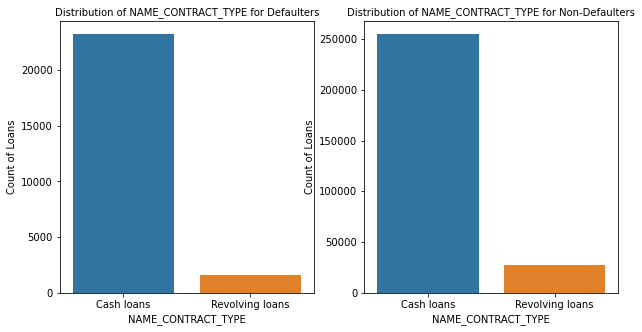

In [21]:
plot_charts('NAME_CONTRACT_TYPE', False, True)

More women were looking for loans than men.

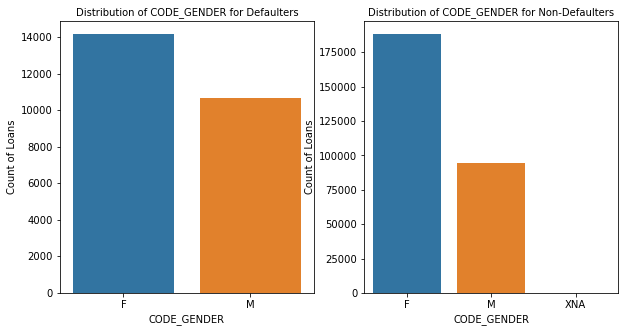

In [22]:
plot_charts('CODE_GENDER', False, True)

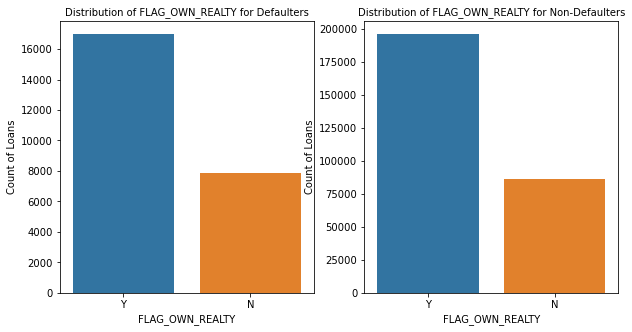

In [23]:
plot_charts('FLAG_OWN_REALTY', False, True)

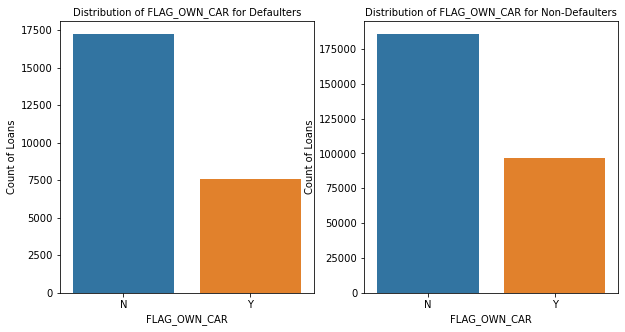

In [24]:
plot_charts('FLAG_OWN_CAR', False, True)

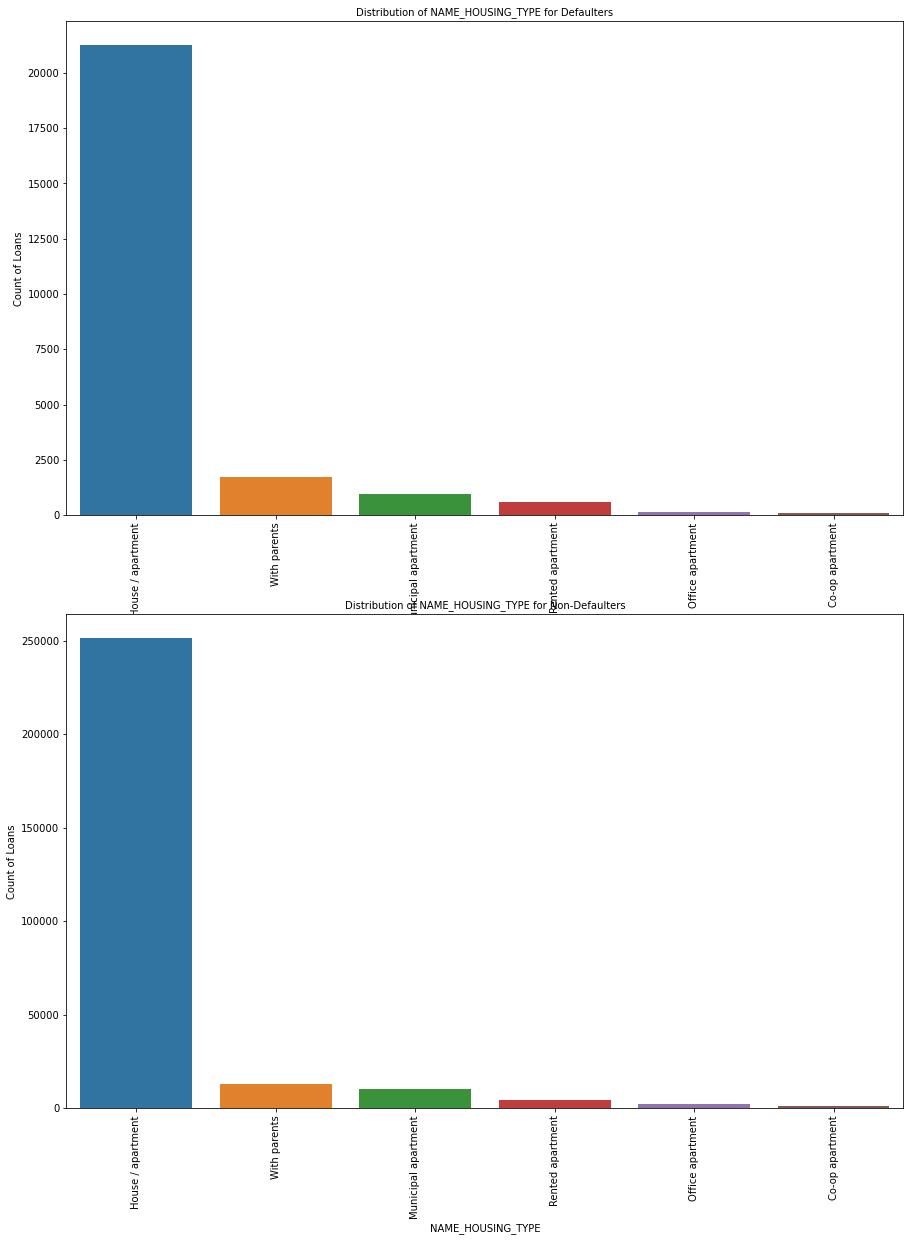

In [25]:
plot_charts('NAME_HOUSING_TYPE', True, False)

Ratio of people who live with parents and default is higher than the non-defaulters. This could be correlated with age, we'll have to look into age to see if that ratio remains similar, as it might just be an insight that younger people tend to default more.

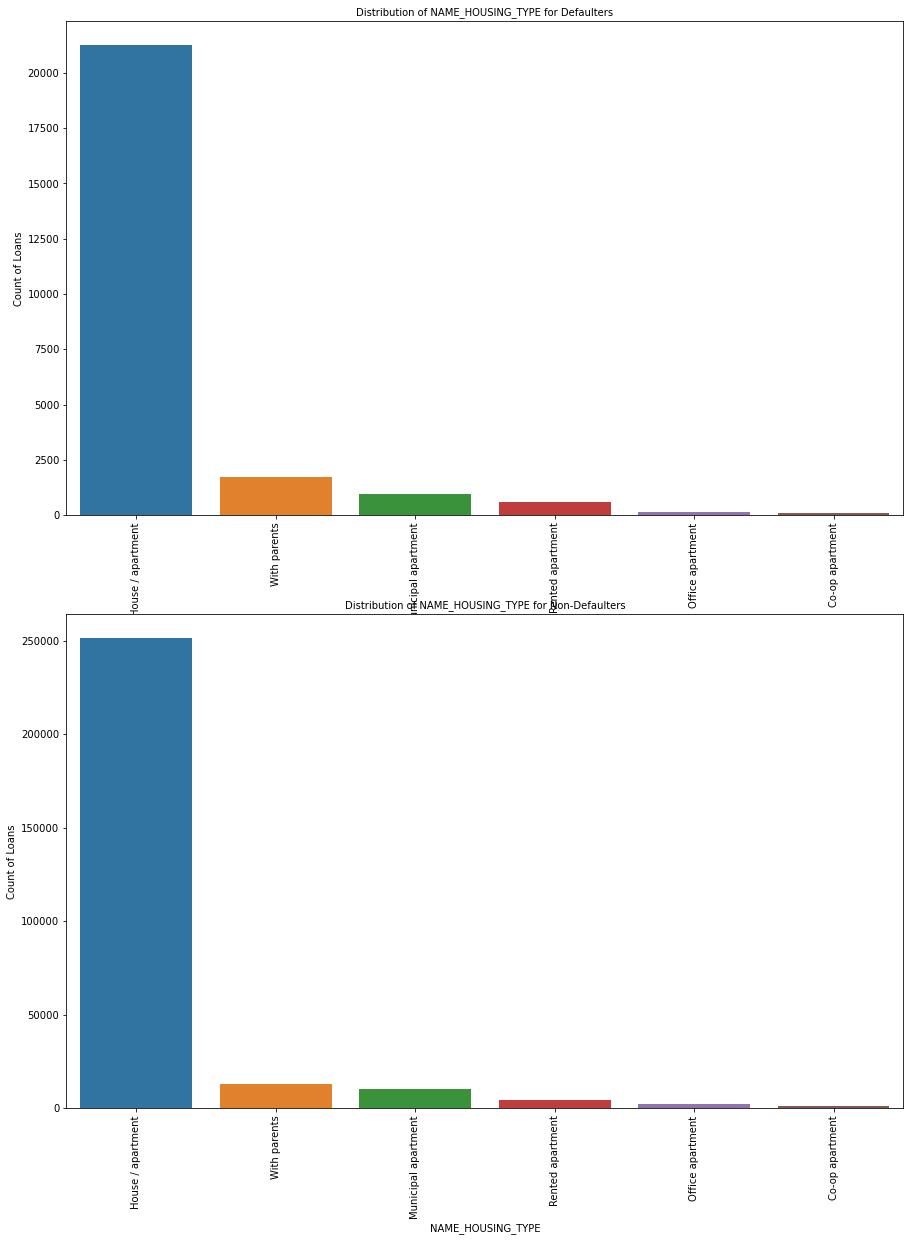

In [26]:
plot_charts('NAME_HOUSING_TYPE', True, False)

<ipython-input-27-778ba3e3be6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appData['AGE'] = appData['DAYS_BIRTH'] / -365


Text(0.5, 1.0, 'Age in years')

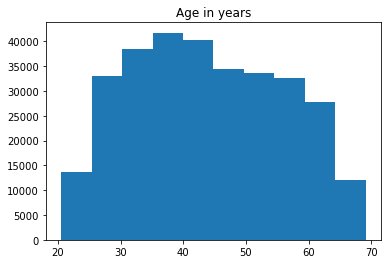

In [27]:
# The dataset has 'DAYS_BIRTH' as a negative number representing the number of days since the birth of the user 
appData['AGE'] = appData['DAYS_BIRTH'] / -365
plt.hist(appData['AGE'])
plt.title('Age in years')

Need to check who is looking for loans, as well as what types of businesses are looking for loans.

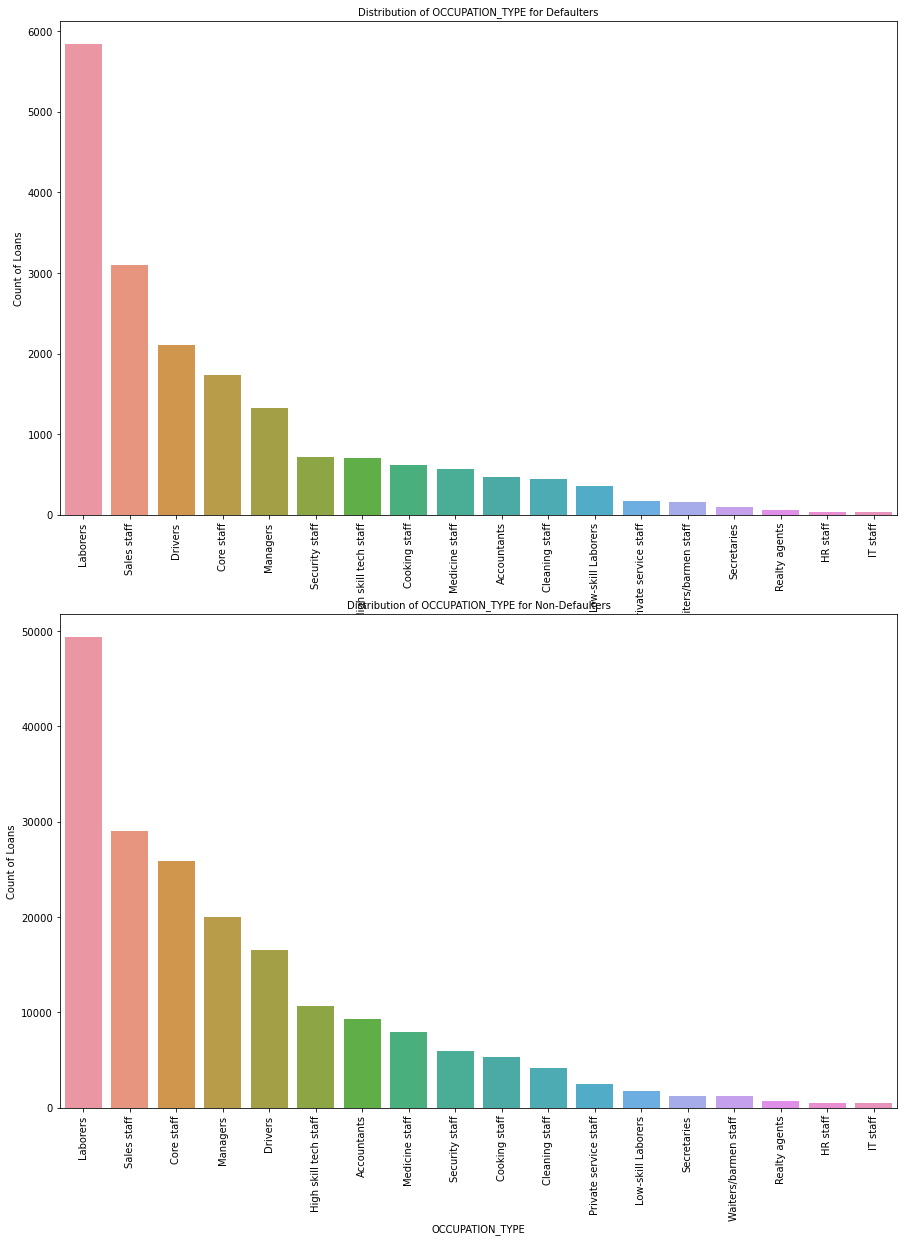

In [28]:
plot_charts('OCCUPATION_TYPE', True, False)

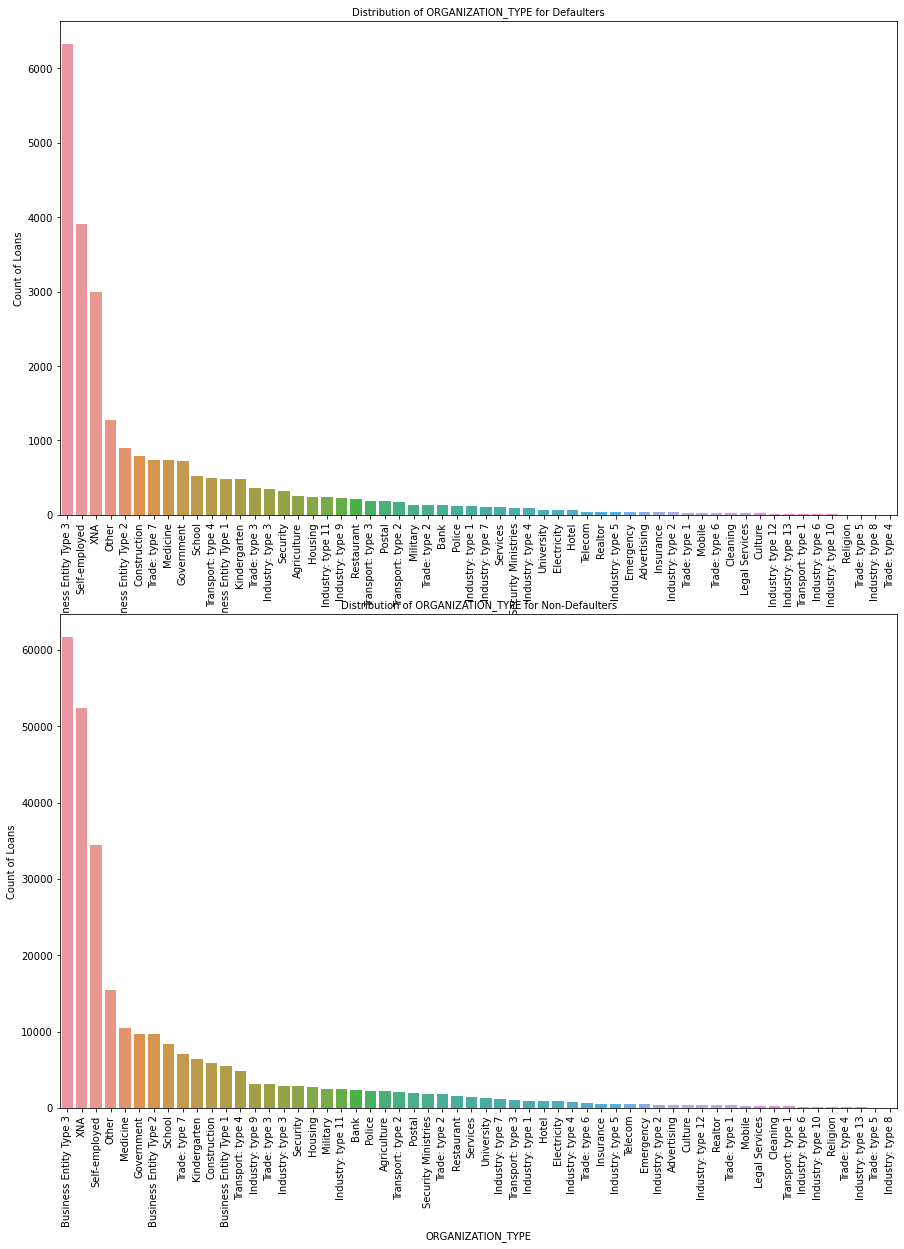

In [29]:
plot_charts('ORGANIZATION_TYPE', True, False)

### Removing Outliers

In [30]:
# Plotting histogram and box plot for a given feature to the function

def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.show()

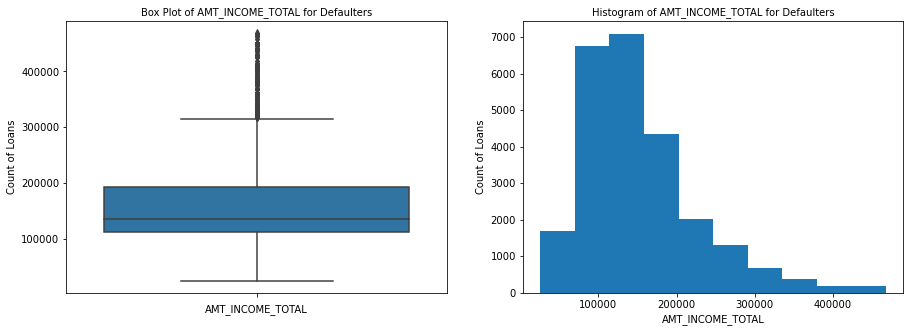

In [31]:
# Removing all entries above 99 percentile

appData=appData[appData.AMT_INCOME_TOTAL<np.nanpercentile(appData['AMT_INCOME_TOTAL'], 99)]

# Update defaulters and non-defaulters after outlier removal

defaulters, nondefaulters = getDefaulterAndNondefaulters(appData)

# Graphing after the outlier removal

plot_boxhist('AMT_INCOME_TOTAL')

In [32]:
defaulter.loc[:,'INCOME_BRACKET']=pd.qcut(appData.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
nonDefaulter.loc[:,'INCOME_BRACKET']=pd.qcut(appData.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


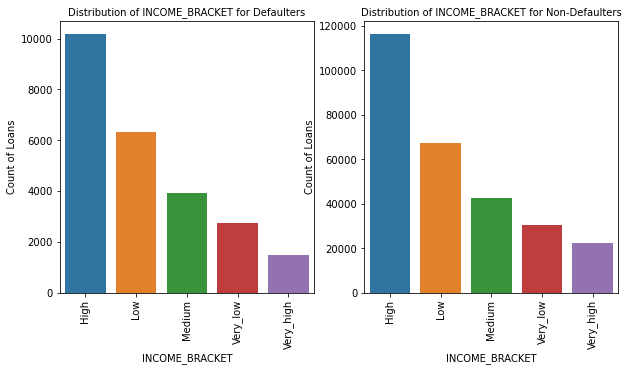

In [33]:
plot_charts('INCOME_BRACKET', True, True)

As we can see, everything follows about the same patter, but with more low income people defaulting, and more very high income people not defaulting. 

### Label Encoding



In [34]:
# Imputig Missing values in the columns with the mean values
def dataSetup(appData):
    le = preprocessing.LabelEncoder()
    for CName in appData.drop('TARGET', axis = 1).columns:
        if type(appData[CName][1]) == str:
            appData[CName] = appData[CName].fillna("Unknown")
        else:
            appData[CName] = appData[CName].fillna(appData[CName].mean(), inplace=True)
        
        if CName == 'TARGET': pass
        else:
            appData[CName] = le.fit_transform(appData[CName])
    return appData, appData['TARGET'], appData.drop('TARGET', axis = 1)

In [35]:
finalAppData, labels, feats= dataSetup(appData)
defaulters, nondefaulters = getDefaulterAndNondefaulters(finalAppData)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
<ipython-input-34-2e4bd863d53f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appData[CName] = appData[CName].fillna(appData[CName].mean(), inplace=True)
<ipython-input-34-2e4bd863d53f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [36]:
feats = np.array(feats)
labels = np.array(labels)

### Model Creation (without dealing with data imbalancement)

#### Random Forest Model

In [37]:
def trainAndPredictRandomForest(xTrain, yTrain, xTest, yTest, estim, dept):
    #Feature scaling
    std_scaler = StandardScaler()    
    xTrain = std_scaler.fit_transform(xTrain)
    xTest = std_scaler.transform(xTest)
    
    # Model training
    rf = RandomForestClassifier(n_estimators = estim, max_depth = dept)
    start = time.time()
    rf.fit(xTrain, yTrain)
    print("RF Training time:", time.time() - start, "seconds")
           
    # Model predicting 
    predictions = rf.predict(xTest)
    print("Prediction:" , np.average(predictions == yTest))
    return predictions, rf

#### Logistic Regression Model

In [38]:
# Returns the prediction of the test data and the model itself

def trainAndPredictLogisticReg(xTrain, yTrain, xTest, yTest):
    #Feature scaling
    std_scaler = StandardScaler()    
    xTrain = std_scaler.fit_transform(xTrain)
    xTest = std_scaler.transform(xTest)
    
    # Model training
    start = time.time()
    reg = LogisticRegression(random_state = 27).fit(xTrain, yTrain)
    print("Logistic Regression Training time:", time.time() - start, "seconds")

    # Model predicting
    prediction = reg.predict(xTest)
    print("Prediction:" , np.average(prediction == yTest))
    return prediction, reg

#### SVM Model

In [39]:
# Returns the prediction of the test data and the model itself

def trainAndPredictSVM(xTrain, yTrain, xTest, yTest):
    #Feature scaling
    std_scaler = StandardScaler()    
    xTrain = std_scaler.fit_transform(xTrain)
    xTest = std_scaler.transform(xTest)
    
    # Model training
    linearSVM = svm.LinearSVC(C=1, max_iter=1000)
    start = time.time()    
    linearSVM.fit(xTrain, yTrain)
    print("SVM Training time:", time.time() - start, "seconds")
    
    # Model predicting
    prediction = linearSVM.predict(xTest)
    print("Prediction:" , np.average(prediction == yTest))
    return prediction, linearSVM

### Learning Curve

In [40]:
# Creating learning curve for the model after training

def draw_learning_curve(model, x, labels, cv, numTrainSizes, modelName):
    trainingSetSize = len(x)*0.66 #Training set is 66% always
    train_sizes = []
    for i in range(numTrainSizes):
        train_sizes.append((i+1)*int(trainingSetSize//numTrainSizes))
    print("Training sizes", train_sizes)
    
    #Feature scaling
    std_scaler = StandardScaler()    
    xScaled = std_scaler.fit_transform(x)    
    
    train_sizes, train_scores, validation_scores = learning_curve(estimator=model, X=xScaled, y=labels, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error') 
#     print("Val scores:", validation_scores)
#     print("Train Scores:", train_scores)
    
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) # separator
    print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title(str('Learning curves for '+modelName+' model'), fontsize = 18, y = 1.03)
    plt.legend()
    return plt
    # plt.xlim(0,10000)
    # plt.ylim(0.85,1)

### Cross Validation



In [41]:
# Cross validation with 3 folds is performed by keeping test data size as 33%
from sklearn.model_selection import StratifiedShuffleSplit as sss
# Creating 3 splits
stratifiedShuffSplitter = sss(n_splits=3, test_size = .33, random_state = 27)

In [42]:
# Evaluating the Models by calculating Precision, Recall, F1 score and confusion matrix

def evaluateModel(yActual, yPredicted):
    print(np.average(yPredicted == yActual), "Average Correct")
    print(PS(yActual, yPredicted, average='micro'), "Number for Precision score")
    print(RS(yActual, yPredicted, average='micro'), "Number for Recall Score")
    print(FS(yActual, yPredicted, average='micro'), "Number for F1 score")
    
    # Plotting the confusion matrix
    confusionMat = confusion_matrix(yActual, yPredicted)
    np.fill_diagonal(confusionMat, 0)
    plt.matshow(confusionMat)

In [43]:
# - Creating the Model
# - Running Predictions 
# - Evaluating the Models by calculating Precision, Recall, F1 score and confusion matrix
# - Cross validating the model with the number of folds specified in the shuffler

def createAndCrossRandomForest(xData, labels, stratifiedShuffSplitter):
    counter = 0
    # Running the cross validation on the number of sets specified on the splitter

    for train_index, test_index in stratifiedShuffSplitter.split(xData, labels):
        counter += 1
        print("\n=============\nRunning the", counter, "set")
        print(train_index.shape, test_index.shape)        
        xTrain, yTrain = xData[train_index], labels[train_index]
        xTest, yTest = xData[test_index], labels[test_index]

        #Feature scaling
        std_scaler = StandardScaler()    
        xTrain = std_scaler.fit_transform(xTrain)
        xTest = std_scaler.transform(xTest)
        
        # Training and predicting Random forest
        print("\nRunning Random Forest")
        rf = RandomForestClassifier(n_estimators = 1, max_depth = 1)
        start = time.time()
        rf.fit(xTrain, yTrain)
        print("RF Training time:", time.time() - start, "seconds")

        predictions = rf.predict(xTest)
        evaluateModel(yTest, predictions) 
        plt.show()
        
        model = RandomForestClassifier(n_estimators = 1, max_depth = 1)
        draw_learning_curve(model=model, x=xData, labels=labels, cv=5, numTrainSizes=20, modelName=str("Random Forest Split Num:"+str(counter)))
        plt.show()

In [44]:

def createAndCrossLogisticReg(xData, labels, stratifiedShuffSplitter):
    counter = 0

    for train_index, test_index in stratifiedShuffSplitter.split(xData, labels):
        counter += 1
        print("\n\n Running the", counter, "set")
        print(train_index.shape, test_index.shape)        
        xTrain, yTrain = xData[train_index], labels[train_index]
        xTest, yTest = xData[test_index], labels[test_index]

        #Feature scaling
        std_scaler = StandardScaler()    
        xTrain = std_scaler.fit_transform(xTrain)
        xTest = std_scaler.transform(xTest)
        
        # Training and predicting Logistic Regression
        print("\nRunning Logistic Regression")
        start = time.time()
        reg = LogisticRegression(random_state = 0).fit(xTrain, yTrain)
        print("Logistic Regression Training time:", time.time() - start, "seconds")

        predictions = reg.predict(xTest)
        evaluateModel(yTest, predictions)
        plt.show()
        
        model = LogisticRegression(random_state = 0)
        draw_learning_curve(model=model, x=xData, labels=labels, cv=5, numTrainSizes=20, modelName=str("Logistic Regression Split Num:"+str(counter)))        
        plt.show()

In [45]:


def createAndCrossSVM(xData, labels, stratifiedShuffSplitter):
    counter = 0
    # Running the cross validation on the number of sets specified on the 
    # splitter
    for train_index, test_index in stratifiedShuffSplitter.split(xData, labels):
        counter += 1
        print("\n\n Running the", counter, "set")
        print(train_index.shape, test_index.shape)        
        xTrain, yTrain = xData[train_index], labels[train_index]
        xTest, yTest = xData[test_index], labels[test_index]

        #Feature scaling
        std_scaler = StandardScaler()    
        xTrain = std_scaler.fit_transform(xTrain)
        xTest = std_scaler.transform(xTest)
        
        print("\nRunning SVM")
        # Model training
        linearSVM = svm.LinearSVC(C=1, max_iter=1000)
        start = time.time()    
        linearSVM.fit(xTrain, yTrain)
        print("SVM Training time:", time.time() - start, "seconds")

        # Model predicting
        predictions = linearSVM.predict(xTest)
        evaluateModel(yTest, predictions)
        plt.show()
        
        model = svm.LinearSVC(C=1, max_iter=1000)
        draw_learning_curve(model=model, x=xData, labels=labels, cv=5, numTrainSizes=20, modelName=str("SVM Split Num:"+str(counter)))
        plt.show()

#### Cross validation with all filtered features



Running the 1 set
(203959,) (100458,)

Running Random Forest
RF Training time: 0.13234424591064453 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


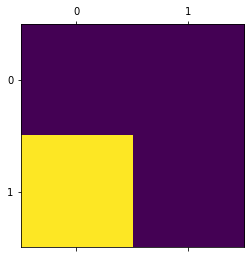

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

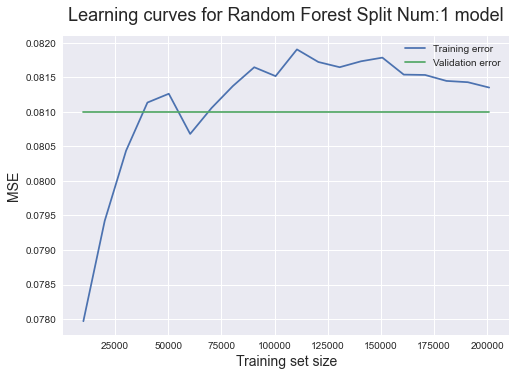


Running the 2 set
(203959,) (100458,)

Running Random Forest
RF Training time: 0.07814526557922363 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


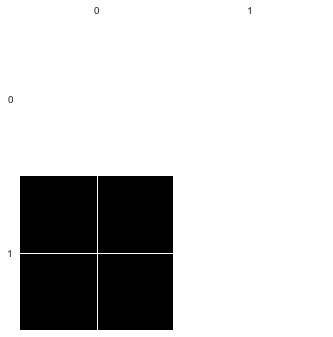

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.081004
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

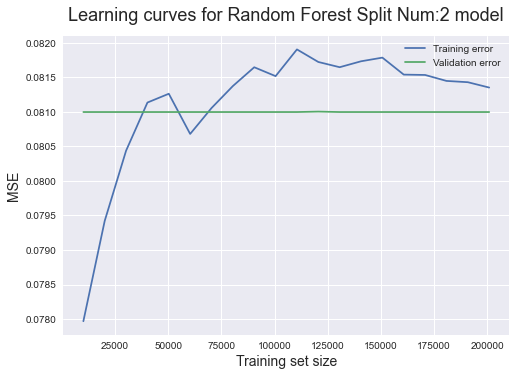


Running the 3 set
(203959,) (100458,)

Running Random Forest
RF Training time: 0.0937354564666748 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


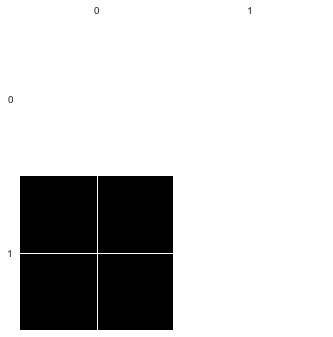

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081376
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080994
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

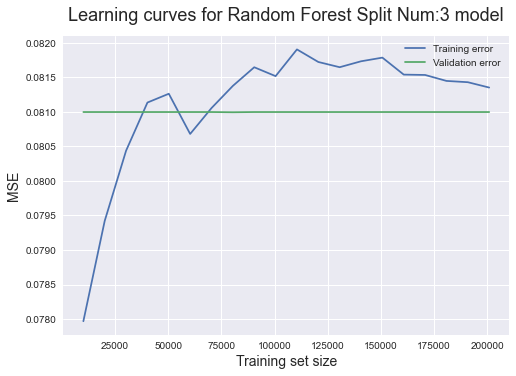

In [46]:
# Creating and evaluating the models with all the 99 filtered features after the data cleanup 
createAndCrossRandomForest(feats, labels, stratifiedShuffSplitter)



 Running the 1 set
(203959,) (100458,)

Running Logistic Regression
Logistic Regression Training time: 1.829923152923584 seconds
0.9189910211232555 Average Correct
0.9189910211232555 Number for Precision score
0.9189910211232555 Number for Recall Score
0.9189910211232555 Number for F1 score


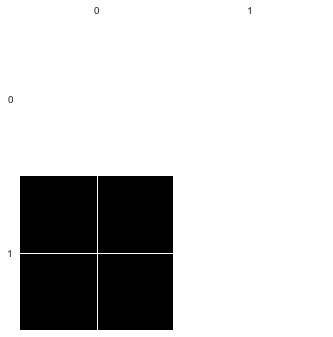

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077949
20090     0.079423
30135     0.080431
40180     0.081155
50225     0.081274
60270     0.080694
70315     0.081067
80360     0.081376
90405     0.081648
100450    0.081519
110495    0.081906
120540    0.081724
130585    0.081650
140630    0.081735
150675    0.081788
160720    0.081542
170765    0.081537
180810    0.081450
190855    0.081430
200900    0.081353
dtype: float64

 --------------------

Mean validation scores

 10045     0.081050
20090     0.080997
30135     0.081004
40180     0.081014
50225     0.081011
60270     0.081011
70315     0.081011
80360     0.081007
90405     0.081007
100450    0.081007
110495    0.081004
120540    0.081004
130585    0.081004
140630    0.081004
150675    0.081004
160720    0.081004
170765    0.081004
180810    0.081004
190855    0.081001
20090

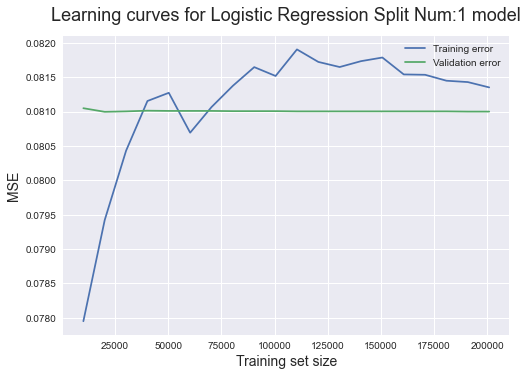



 Running the 2 set
(203959,) (100458,)

Running Logistic Regression
Logistic Regression Training time: 1.898280143737793 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


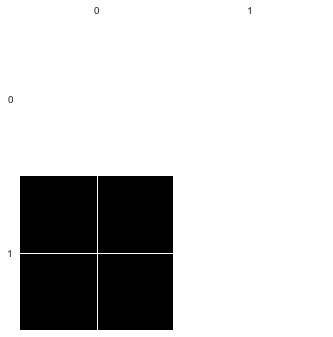

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077949
20090     0.079423
30135     0.080431
40180     0.081155
50225     0.081274
60270     0.080694
70315     0.081067
80360     0.081376
90405     0.081648
100450    0.081519
110495    0.081906
120540    0.081724
130585    0.081650
140630    0.081735
150675    0.081788
160720    0.081542
170765    0.081537
180810    0.081450
190855    0.081430
200900    0.081353
dtype: float64

 --------------------

Mean validation scores

 10045     0.081050
20090     0.080997
30135     0.081004
40180     0.081014
50225     0.081011
60270     0.081011
70315     0.081011
80360     0.081007
90405     0.081007
100450    0.081007
110495    0.081004
120540    0.081004
130585    0.081004
140630    0.081004
150675    0.081004
160720    0.081004
170765    0.081004
180810    0.081004
190855    0.081001
20090

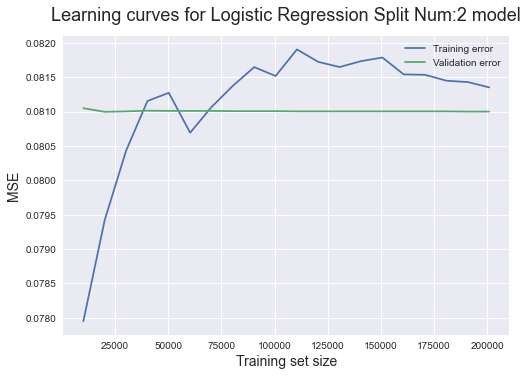



 Running the 3 set
(203959,) (100458,)

Running Logistic Regression
Logistic Regression Training time: 1.8906404972076416 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


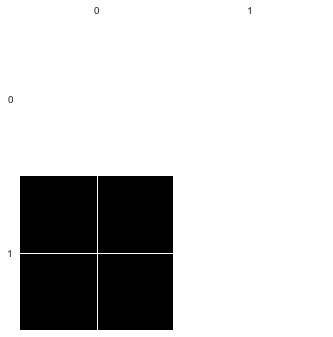

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077949
20090     0.079423
30135     0.080431
40180     0.081155
50225     0.081274
60270     0.080694
70315     0.081067
80360     0.081376
90405     0.081648
100450    0.081519
110495    0.081906
120540    0.081724
130585    0.081650
140630    0.081735
150675    0.081788
160720    0.081542
170765    0.081537
180810    0.081450
190855    0.081430
200900    0.081353
dtype: float64

 --------------------

Mean validation scores

 10045     0.081050
20090     0.080997
30135     0.081004
40180     0.081014
50225     0.081011
60270     0.081011
70315     0.081011
80360     0.081007
90405     0.081007
100450    0.081007
110495    0.081004
120540    0.081004
130585    0.081004
140630    0.081004
150675    0.081004
160720    0.081004
170765    0.081004
180810    0.081004
190855    0.081001
20090

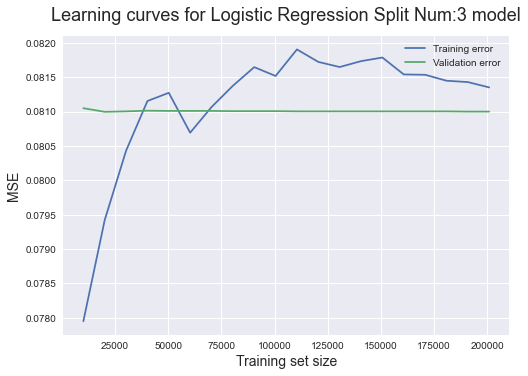

In [47]:
createAndCrossLogisticReg(feats, labels, stratifiedShuffSplitter)



 Running the 1 set
(203959,) (100458,)

Running SVM


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM Training time: 89.113272190094 seconds
0.9188715682175636 Average Correct
0.9188715682175636 Number for Precision score
0.9188715682175636 Number for Recall Score
0.9188715682175636 Number for F1 score


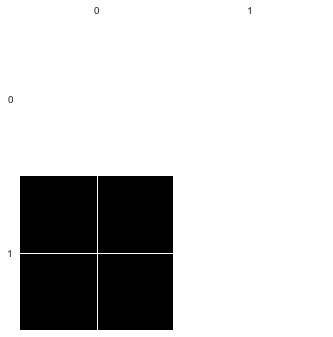

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

KeyboardInterrupt: 

In [48]:
createAndCrossSVM(feats, labels, stratifiedShuffSplitter)

#### Cross validation with reduced dimensionality using PCA

In [61]:
def projData(myX, myU, K):
    return myX @ myU[:, :K]

In [62]:
# Reducing to features
loweredDimension = 30  

scaler = StandardScaler() 
xScaled = scaler.fit_transform(feats)                      #Have to scale features for PCA to work

covariance = (1 / xScaled.shape[0]) * xScaled.T @ xScaled #Calculate the covariance matrix for Singular Value decomp
U, S, V = sp.linalg.svd(covariance)

xReduced = projData(xScaled, U, loweredDimension)         #Projects data into lower dimension 


Running the 1 set
(203959,) (100458,)

Running Random Forest
RF Training time: 0.15094590187072754 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


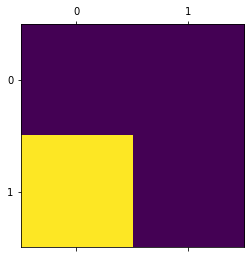

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

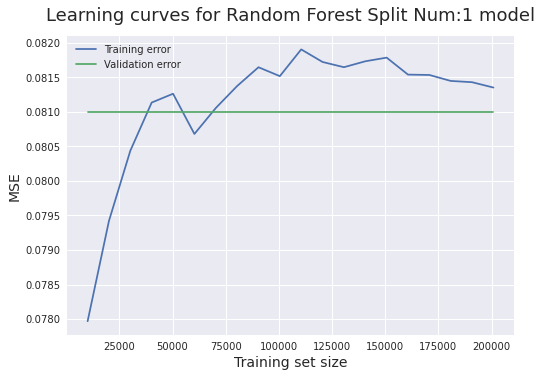


Running the 2 set
(203959,) (100458,)

Running Random Forest
RF Training time: 0.14176368713378906 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


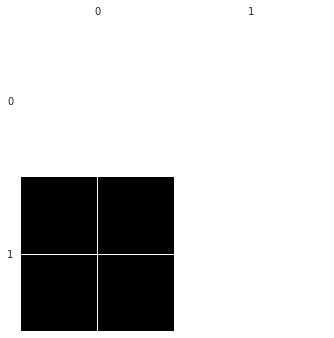

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

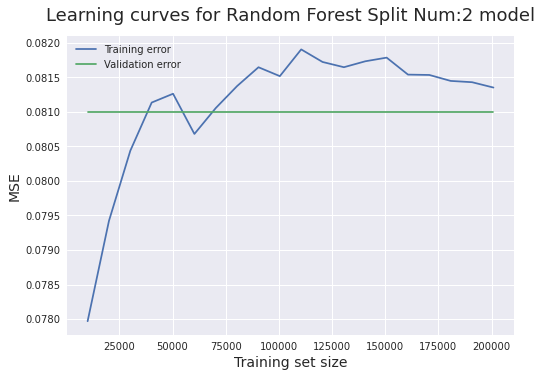


Running the 3 set
(203959,) (100458,)

Running Random Forest
RF Training time: 0.13916349411010742 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


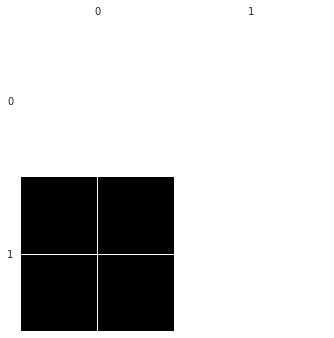

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079433
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.081017
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

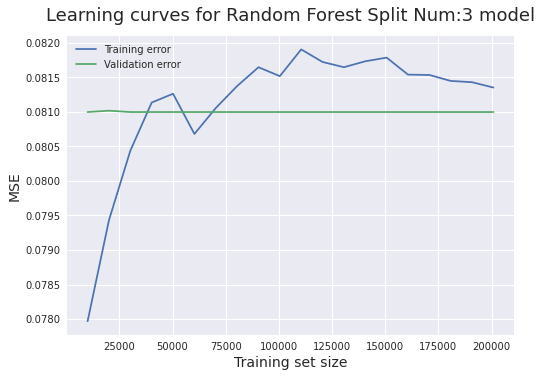

In [48]:
# Creating and evaluating models with reduced dimensionality

createAndCrossRandomForest(xReduced, labels, stratifiedShuffSplitter)



 Running the 1 set
(203959,) (100458,)

Running Logistic Regression
Logistic Regression Training time: 1.3458173274993896 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


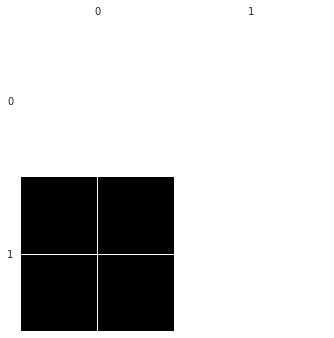

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Mean training scores

 10045     0.077949
20090     0.079423
30135     0.080445
40180     0.081155
50225     0.081278
60270     0.080684
70315     0.081052
80360     0.081371
90405     0.081644
100450    0.081515
110495    0.081902
120540    0.081721
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081450
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.081103
20090     0.081037
30135     0.081004
40180     0.081024
50225     0.081017
60270     0.081017
70315     0.081017
80360     0.081004
90405     0.081011
100450    0.081004
110495    0.081004
120540    0.081004
130585    0.081004
140630    0.081004
150675    0.081004
160720    0.081004
170765    0.081004
180810    0.081004
190855    0.081004
200900    0.081004
dtype: float64


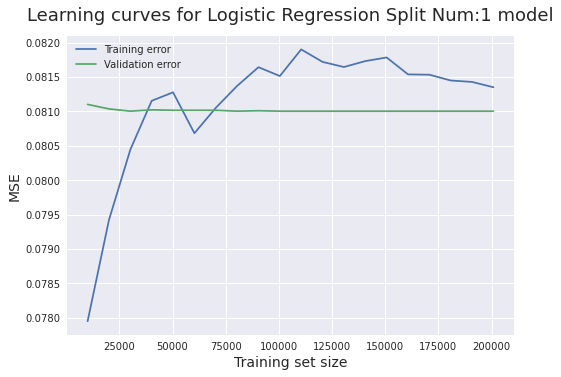



 Running the 2 set
(203959,) (100458,)

Running Logistic Regression


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Training time: 1.282491683959961 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


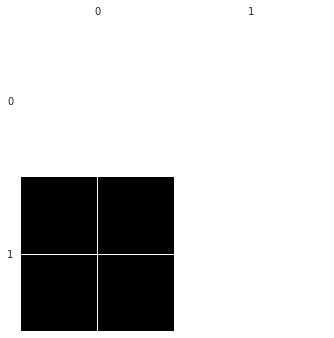

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Mean training scores

 10045     0.077949
20090     0.079423
30135     0.080445
40180     0.081155
50225     0.081278
60270     0.080684
70315     0.081052
80360     0.081371
90405     0.081644
100450    0.081515
110495    0.081902
120540    0.081721
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081450
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.081103
20090     0.081037
30135     0.081004
40180     0.081024
50225     0.081017
60270     0.081017
70315     0.081017
80360     0.081004
90405     0.081011
100450    0.081004
110495    0.081004
120540    0.081004
130585    0.081004
140630    0.081004
150675    0.081004
160720    0.081004
170765    0.081004
180810    0.081004
190855    0.081004
200900    0.081004
dtype: float64


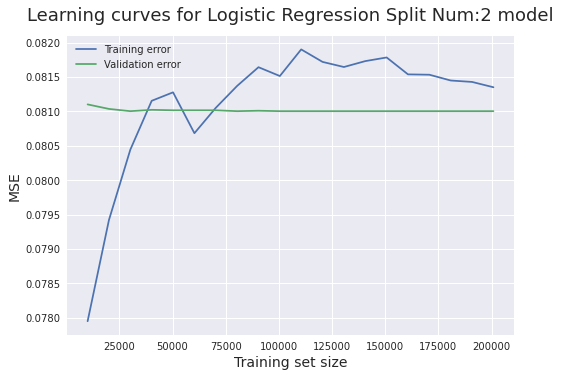



 Running the 3 set
(203959,) (100458,)

Running Logistic Regression
Logistic Regression Training time: 0.9906930923461914 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


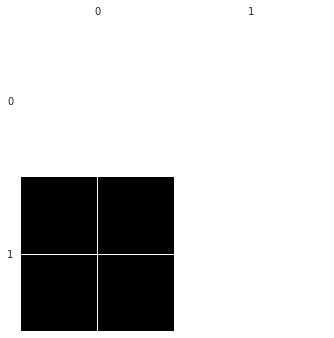

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Mean training scores

 10045     0.077949
20090     0.079423
30135     0.080445
40180     0.081155
50225     0.081278
60270     0.080684
70315     0.081052
80360     0.081371
90405     0.081644
100450    0.081515
110495    0.081902
120540    0.081721
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081450
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.081103
20090     0.081037
30135     0.081004
40180     0.081024
50225     0.081017
60270     0.081017
70315     0.081017
80360     0.081004
90405     0.081011
100450    0.081004
110495    0.081004
120540    0.081004
130585    0.081004
140630    0.081004
150675    0.081004
160720    0.081004
170765    0.081004
180810    0.081004
190855    0.081004
200900    0.081004
dtype: float64


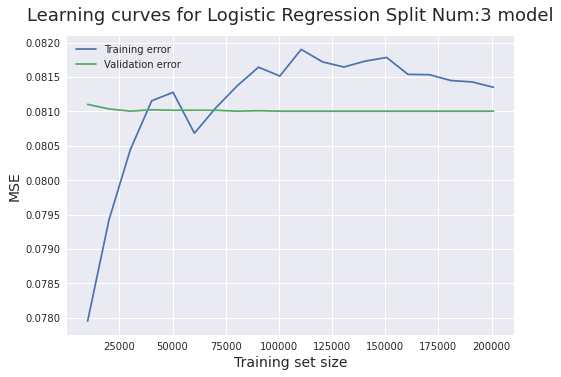

In [49]:
createAndCrossLogisticReg(xReduced, labels, stratifiedShuffSplitter)



 Running the 1 set
(203959,) (100458,)

Running SVM
SVM Training time: 78.96776628494263 seconds
0.9189711123056402 Average Correct
0.9189711123056402 Number for Precision score
0.9189711123056402 Number for Recall Score
0.9189711123056402 Number for F1 score


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


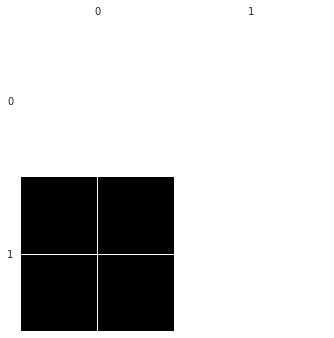

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]


/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/ubuntu/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Li

In [ ]:
createAndCrossSVM(xReduced, labels, stratifiedShuffSplitter)

#### Cross validation using important features
The models are created using the important data found using Random Forest and LR

#### Random Forest
Finding important features from random forest

In [49]:
# Combine all the train the samples from the sss

stratifiedShuffSplitterRF = sss(n_splits=1, test_size = .33, random_state = 27)

# Running the cross validation on the number of sets specified on the splitter


for train_indices, test_indices in stratifiedShuffSplitterRF.split(feats, labels):
    xTrain, yTrain = feats[train_indices], labels[train_indices]
    xTest, yTest = feats[test_indices], labels[test_indices]

In [50]:
predictions, rf = trainAndPredictRandomForest(xTrain, yTrain, xTest, yTest, 1, 1)

RF Training time: 0.10938620567321777 seconds
Prediction: 0.9190009755320632


#### Logistic Regression
Finding important features from Logistic Regression

In [51]:
predictions, lr = trainAndPredictLogisticReg(xTrain, yTrain, xTest, yTest)

Logistic Regression Training time: 1.7689051628112793 seconds
Prediction: 0.9189910211232555


#### Identifying important data

In [52]:
# Find the important features of RF

RFimportances = rf.feature_importances_
# print(RFimportances)
LRimportances = lr.coef_[0]
# print(LRimportances)
        
# Remove the less important features from the original dataset

colsToDelete = []
for i in range(len(RFimportances)):
    if RFimportances[i] == 0 or LRimportances[i] == 0:
        colsToDelete.append(i)
impFeats = np.delete(feats, colsToDelete, axis=1)
print(impFeats.shape)

(304417, 1)


There are only 46 features which have weight towards the prediction

#### Cross Validation for all models


Running the 1 set
(203959,) (100458,)

Running Random Forest
RF Training time: 0.03197956085205078 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


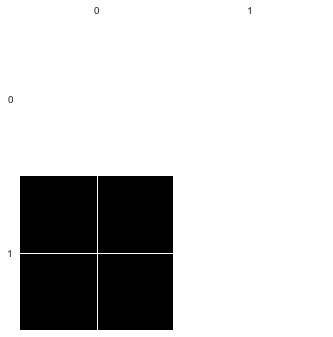

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

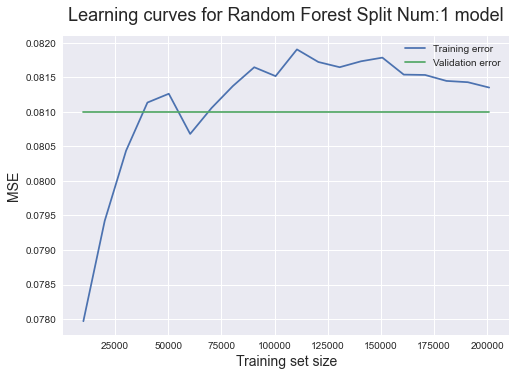


Running the 2 set
(203959,) (100458,)

Running Random Forest
RF Training time: 0.02040576934814453 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


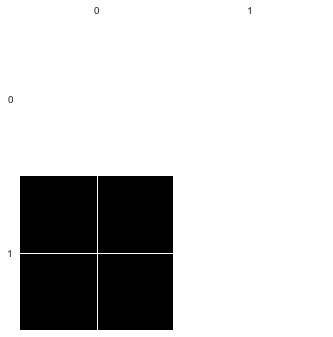

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

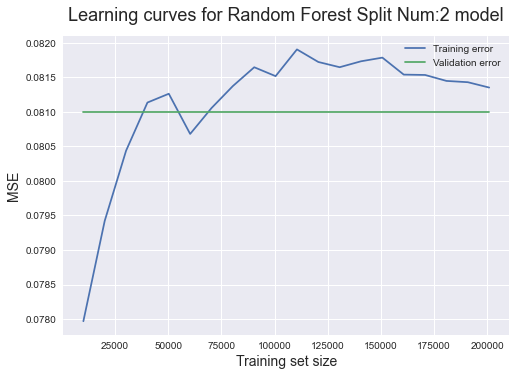


Running the 3 set
(203959,) (100458,)

Running Random Forest
RF Training time: 0.04686260223388672 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


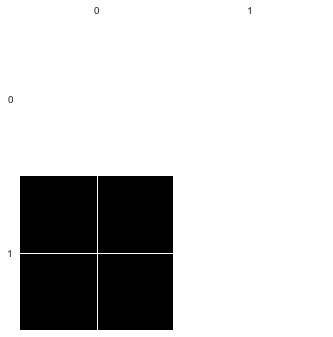

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

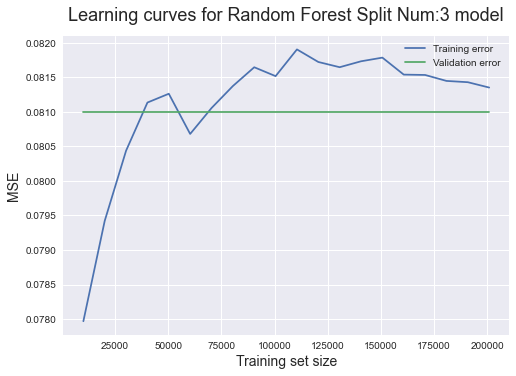

In [53]:
createAndCrossRandomForest(impFeats, labels, stratifiedShuffSplitter)



 Running the 1 set
(203959,) (100458,)

Running Logistic Regression
Logistic Regression Training time: 0.07484292984008789 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


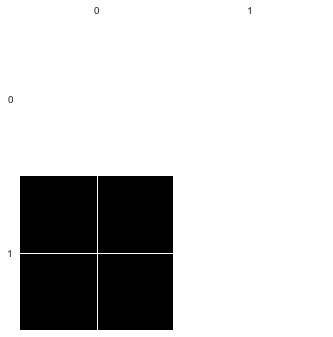

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

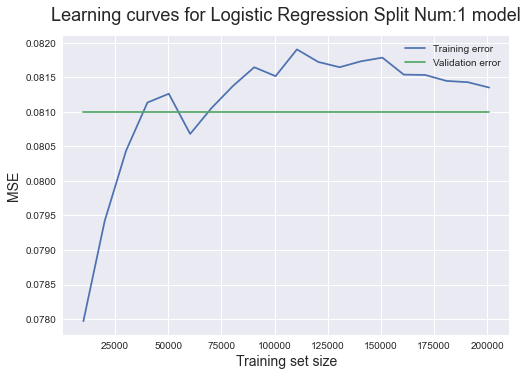



 Running the 2 set
(203959,) (100458,)

Running Logistic Regression
Logistic Regression Training time: 0.09777331352233887 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


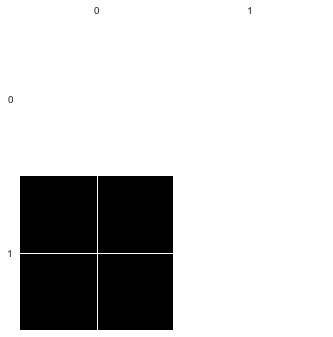

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

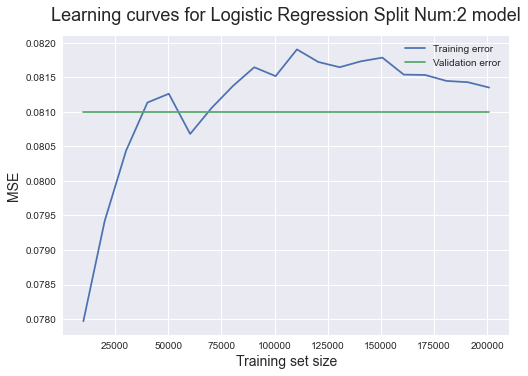



 Running the 3 set
(203959,) (100458,)

Running Logistic Regression
Logistic Regression Training time: 0.10090994834899902 seconds
0.9190009755320632 Average Correct
0.9190009755320632 Number for Precision score
0.9190009755320632 Number for Recall Score
0.9190009755320632 Number for F1 score


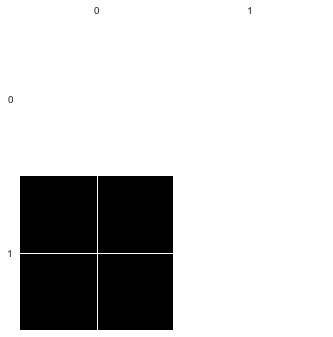

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

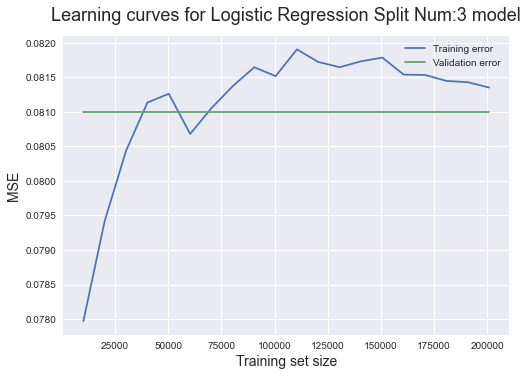

In [54]:
createAndCrossLogisticReg(impFeats, labels, stratifiedShuffSplitter)

In [ ]:
createAndCrossSVM(impFeats, labels, stratifiedShuffSplitter)

### Model Creation (Dealing with data imbalancement)

Most of the machine learning algorithms work the best when the samples in each class are about equal. 

In case of our data set, we have 307,511 total entries out of which 282,686 values are non-defaulters and only 24,825 entries are of defaulters. So the minority class is only about 8% of the entire data set.

There are different techniques which resolve the issue of over sampling. All these techniques are implemented below. 

#### Identifying defaulters and non-defaulters

#### Extracting Defaulters and Non Defaulters using filtered data
Using the filtered data after data cleanup, the defaulters and non defaulters were identified

In [63]:
filteredDefaulters, filteredNonDefaulters = getDefaulterAndNondefaulters(finalAppData)

#### Extracting Defaulters and Non Defaulters using important features
Using the data after finding the important features through Random Forest and Logistic Regression Models, the defaulters and non defaulters were identified

In [64]:
# Getting the data of important features from the dataframe

colNames = finalAppData.drop('TARGET', axis= 1).columns[colsToDelete]
importantData = finalAppData.drop(colNames, axis=1) #Drop all the irrelevant columns   

In [65]:
# Getting the data for defaulter and nondefaulter classes from the important features only 

impDefaulters, impNonDefaulters = getDefaulterAndNondefaulters(importantData)

#### Extracting Defaulters and Non Defaulters using PCA data
Using the reduced data by running PCA, the defaulters and Non defaulters are determined

In [66]:
# Creating a pandas dataframe for the reduced data by PCA

reducedDataDict = {}
#Creating the dictionary for the columns
for i in range(loweredDimension):
    reducedDataDict["C"+str(i+1)] = xReduced[:,i]
reducedDataDict["TARGET"] = labels

pcaData = pd.DataFrame(reducedDataDict, columns=list(reducedDataDict.keys()))
pcaData.head(10)

pcaDefaulters, pcaNonDefaulters = getDefaulterAndNondefaulters(pcaData)

In [67]:
# Splitting the dataset into Labels and Features

def getFeaturesAndLabels(data):
    labels = data.TARGET
    features = data.drop('TARGET', axis = 1)
    return features, labels

### Undersampling Majority Class
Undersampling is a method of removing data from the majority class. This method is a good choice when we have a huge dataset.

Drawback- We might remove valuable data which might lead to an underfit and poor generalization to the test data set.

In [68]:
# Downsampling the majority class

def downsampleMajority(non_defaulter, defaulter):    
    non_defaulters_downsampled = resample(non_defaulter,
                                         replace = False, # resample without replacement
                                         n_samples = len(defaulter), # Minority Class
                                         random_state = 27) # reproducible results

    # Combining minority and downsampled majority class
    
    downsampledData = pd.concat([non_defaulters_downsampled, defaulter])
    return downsampledData

In [69]:
# Getting the test and train split from the downsampled data

def getTestTrainDownsampled(downsampledData):
    # Extracting the features and labels
    downSampledFeatures, downSampledLabels = getFeaturesAndLabels(downsampledData)

    # Split the data into test and train
    trainFeatUnderSamp, testFeatUnderSamp, trainLabelsUnderSamp, testLabelsUnderSamp = train_test_split(downSampledFeatures, downSampledLabels, test_size=0.33, random_state=27)
    return trainFeatUnderSamp, testFeatUnderSamp, trainLabelsUnderSamp, testLabelsUnderSamp

### Undersampling using filtered features
Using the data after peforming the data cleanup

In [70]:
# Verifying counts for Defaulter and Non-Defaulter classes

filDownSampledData = downsampleMajority(filteredNonDefaulters, filteredDefaulters)
filDownSampledData.TARGET.value_counts()

# Getting the undersampled train data and test data

xTrainUnderSamp, xTestUnderSamp, yTrainUnderSamp, yTestUnderSamp = getTestTrainDownsampled(filDownSampledData)

#### Logistic Regression
Running logistic regression for undersampled data

Logistic Regression Training time: 0.1798844337463379 seconds
Prediction: 0.5881774609807054
0.5881774609807054 Average Correct
0.5881774609807054 Number for Precision score
0.5881774609807054 Number for Recall Score
0.5881774609807054 Number for F1 score


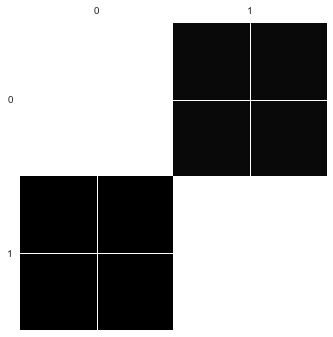

In [71]:
predictions, lr = trainAndPredictLogisticReg(xTrainUnderSamp, yTrainUnderSamp, xTestUnderSamp, yTestUnderSamp)
evaluateModel(yTestUnderSamp, predictions)

Training sizes [3254, 6508, 9762, 13016, 16270, 19524, 22778, 26032, 29286, 32540]
Mean training scores

 3254          NaN
6508          NaN
9762          NaN
13016         NaN
16270         NaN
19524         NaN
22778    0.134015
26032    0.242163
29286    0.319941
32540    0.370602
dtype: float64

 --------------------

Mean validation scores

 3254          NaN
6508          NaN
9762          NaN
13016         NaN
16270         NaN
19524         NaN
22778    0.499980
26032    0.497141
29286    0.473192
32540    0.439976
dtype: float64


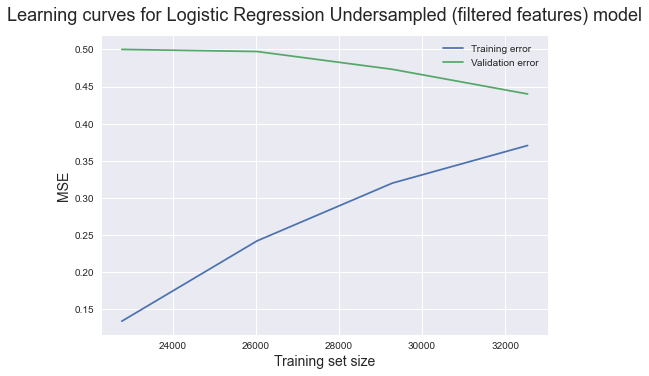

In [72]:
#Plotting the learning curve
xData, yData = getFeaturesAndLabels(filDownSampledData)
model = LogisticRegression(random_state = 27)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=10, modelName="Logistic Regression Undersampled (filtered features)")
plt.show()

#### SVM 
Running SVM for undersampled data

In [ ]:
predictions, lr = trainAndPredictSVM(xTrainUnderSamp, yTrainUnderSamp, xTestUnderSamp, yTestUnderSamp)
evaluateModel(yTestUnderSamp, predictions)

In [ ]:
#==============================================================================
# Plotting the learning curve
#==============================================================================

xData, yData = getFeaturesAndLabels(filDownSampledData)
model = svm.LinearSVC(C=1, max_iter=100)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=10, modelName="SVM Undersampled (filtered features)")
plt.show()

#### Random Forest
Running Random forest for undersampled data

RF Training time: 0.11413693428039551 seconds
Prediction: 0.5817254516406538
0.5817254516406538 Average Correct
0.5817254516406538 Number for Precision score
0.5817254516406538 Number for Recall Score
0.5817254516406538 Number for F1 score


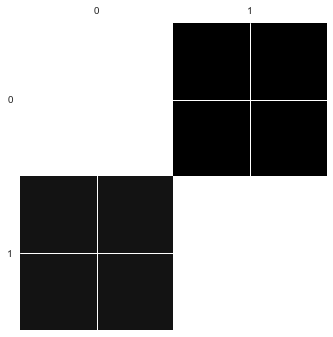

In [73]:
predictions, rf = trainAndPredictRandomForest(xTrainUnderSamp, yTrainUnderSamp, xTestUnderSamp, yTestUnderSamp, 15, 4)
evaluateModel(yTestUnderSamp, predictions) 

Training sizes [3254, 6508, 9762, 13016, 16270, 19524, 22778, 26032, 29286, 32540]
Mean training scores

 3254    -0.000000
6508    -0.000000
9762    -0.000000
13016   -0.000000
16270   -0.000000
19524   -0.000000
22778    0.134006
26032    0.242256
29286    0.326449
32540    0.393128
dtype: float64

 --------------------

Mean validation scores

 3254     0.500000
6508     0.500000
9762     0.500000
13016    0.500000
16270    0.500000
19524    0.500000
22778    0.500000
26032    0.500000
29286    0.500000
32540    0.498986
dtype: float64


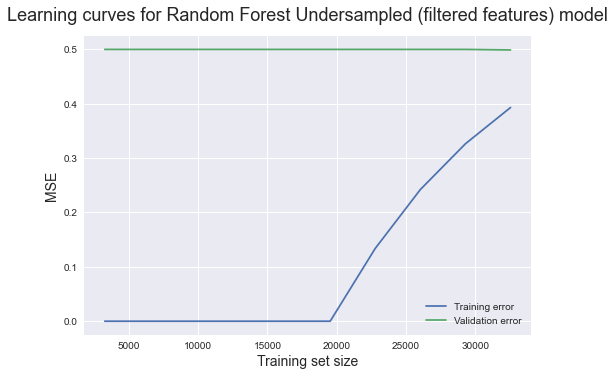

In [74]:
xData, yData = getFeaturesAndLabels(filDownSampledData)
model = RandomForestClassifier(n_estimators = 15, max_depth = 4)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=10, modelName="Random Forest Undersampled (filtered features)")
plt.show()

### Undersampling using important features data
The important data found through Logistic Regression and Random Forest is only used

In [75]:
# Verifying counts for Defaulter and Non-Defaulter classes

impDownSampledData = downsampleMajority(impNonDefaulters, impDefaulters)
impDownSampledData.TARGET.value_counts()

# Getting the undersampled train data and test data

xTrainUnderSamp, xTestUnderSamp, yTrainUnderSamp, yTestUnderSamp = getTestTrainDownsampled(impDownSampledData)

#### Logistic Regression
Running logistic regression for undersampled data

Logistic Regression Training time: 0.010971307754516602 seconds
Prediction: 0.5449182745483594
0.5449182745483594 Average Correct
0.5449182745483594 Number for Precision score
0.5449182745483594 Number for Recall Score
0.5449182745483594 Number for F1 score


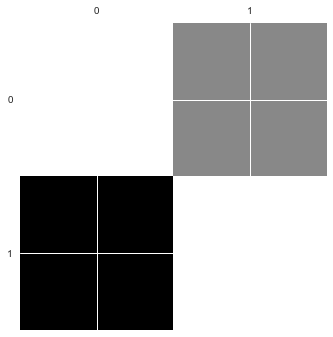

In [77]:
# Training and Predicting Logistic Regression Model
predictions, lr = trainAndPredictLogisticReg(xTrainUnderSamp, yTrainUnderSamp, xTestUnderSamp, yTestUnderSamp)
evaluateModel(yTestUnderSamp, predictions)

Training sizes [1627, 3254, 4881, 6508, 8135, 9762, 11389, 13016, 14643, 16270, 17897, 19524, 21151, 22778, 24405, 26032, 27659, 29286, 30913, 32540]
Mean training scores

 1627          NaN
3254          NaN
4881          NaN
6508          NaN
8135          NaN
9762          NaN
11389         NaN
13016         NaN
14643         NaN
16270         NaN
17897         NaN
19524         NaN
21151    0.067392
22778    0.134006
24405    0.191739
26032    0.242256
27659    0.286829
29286    0.326449
30913    0.361900
32540    0.393805
dtype: float64

 --------------------

Mean validation scores

 1627     NaN
3254     NaN
4881     NaN
6508     NaN
8135     NaN
9762     NaN
11389    NaN
13016    NaN
14643    NaN
16270    NaN
17897    NaN
19524    NaN
21151    0.5
22778    0.5
24405    0.5
26032    0.5
27659    0.5
29286    0.5
30913    0.5
32540    0.5
dtype: float64


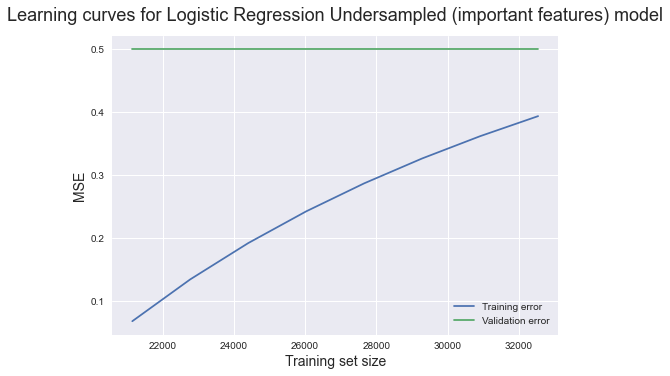

In [78]:
xData, yData = getFeaturesAndLabels(impDownSampledData)
model = LogisticRegression(random_state = 27)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Logistic Regression Undersampled (important features)")
plt.show()

#### SVM 
Running SVM for undersampled data

In [ ]:
predictions, lr = trainAndPredictSVM(xTrainUnderSamp, yTrainUnderSamp, xTestUnderSamp, yTestUnderSamp)
evaluateModel(yTestUnderSamp, predictions)

In [ ]:
#==============================================================================
# Plotting the learning curve
#==============================================================================

xData, yData = getFeaturesAndLabels(impDownSampledData)
model = svm.LinearSVC(C=1, max_iter=1000)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="SVM Undersampled (important features)")
plt.show()

#### Random Forest
Running Random forest for undersampled data

RF Training time: 0.038881778717041016 seconds
Prediction: 0.5449182745483594
0.5449182745483594 Average Correct
0.5449182745483594 Number for Precision score
0.5449182745483594 Number for Recall Score
0.5449182745483594 Number for F1 score


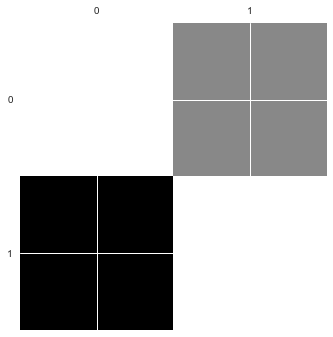

In [79]:
predictions, rf = trainAndPredictRandomForest(xTrainUnderSamp, yTrainUnderSamp, xTestUnderSamp, yTestUnderSamp, 7, 3)
evaluateModel(yTestUnderSamp, predictions) 

Training sizes [1627, 3254, 4881, 6508, 8135, 9762, 11389, 13016, 14643, 16270, 17897, 19524, 21151, 22778, 24405, 26032, 27659, 29286, 30913, 32540]
Mean training scores

 1627    -0.000000
3254    -0.000000
4881    -0.000000
6508    -0.000000
8135    -0.000000
9762    -0.000000
11389   -0.000000
13016   -0.000000
14643   -0.000000
16270   -0.000000
17897   -0.000000
19524   -0.000000
21151    0.067392
22778    0.134006
24405    0.191739
26032    0.242256
27659    0.286829
29286    0.326449
30913    0.361900
32540    0.393805
dtype: float64

 --------------------

Mean validation scores

 1627     0.5
3254     0.5
4881     0.5
6508     0.5
8135     0.5
9762     0.5
11389    0.5
13016    0.5
14643    0.5
16270    0.5
17897    0.5
19524    0.5
21151    0.5
22778    0.5
24405    0.5
26032    0.5
27659    0.5
29286    0.5
30913    0.5
32540    0.5
dtype: float64


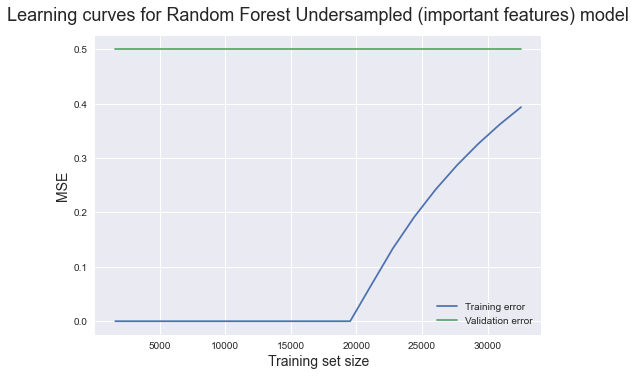

In [80]:
xData, yData = getFeaturesAndLabels(impDownSampledData)
model = RandomForestClassifier(n_estimators = 7, max_depth = 3)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Random Forest Undersampled (important features)")
plt.show()

###  Undersampling using PCA data
The reduced data after running PCA is used for performing undersampling

In [81]:
# Verifying counts for Defaulter and Non-Defaulter classes

pcaDownSampledData = downsampleMajority(pcaNonDefaulters, pcaDefaulters)
pcaDownSampledData.TARGET.value_counts()

# Getting the undersampled train data and test data

xTrainUnderSamp, xTestUnderSamp, yTrainUnderSamp, yTestUnderSamp = getTestTrainDownsampled(pcaDownSampledData)

#### Logistic Regression
Running logistic regression for undersampled data

Logistic Regression Training time: 0.1805253028869629 seconds
Prediction: 0.5844291507926754
0.5844291507926754 Average Correct
0.5844291507926754 Number for Precision score
0.5844291507926754 Number for Recall Score
0.5844291507926754 Number for F1 score


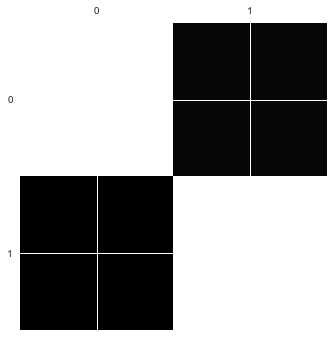

In [82]:
predictions, lr = trainAndPredictLogisticReg(xTrainUnderSamp, yTrainUnderSamp, xTestUnderSamp, yTestUnderSamp)
evaluateModel(yTestUnderSamp, predictions)

Training sizes [1627, 3254, 4881, 6508, 8135, 9762, 11389, 13016, 14643, 16270, 17897, 19524, 21151, 22778, 24405, 26032, 27659, 29286, 30913, 32540]


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean training scores

 1627          NaN
3254          NaN
4881          NaN
6508          NaN
8135          NaN
9762          NaN
11389         NaN
13016         NaN
14643         NaN
16270         NaN
17897         NaN
19524         NaN
21151    0.067392
22778    0.133963
24405    0.191715
26032    0.242140
27659    0.286829
29286    0.324100
30913    0.354873
32540    0.376318
dtype: float64

 --------------------

Mean validation scores

 1627          NaN
3254          NaN
4881          NaN
6508          NaN
8135          NaN
9762          NaN
11389         NaN
13016         NaN
14643         NaN
16270         NaN
17897         NaN
19524         NaN
21151    0.500041
22778    0.500000
24405    0.500020
26032    0.499371
27659    0.495539
29286    0.486880
30913    0.471286
32540    0.452123
dtype: float64


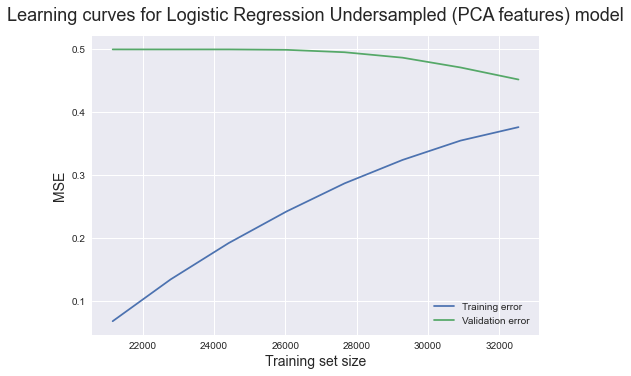

In [83]:
xData, yData = getFeaturesAndLabels(pcaDownSampledData)
model = LogisticRegression(random_state = 27)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Logistic Regression Undersampled (PCA features)")
plt.show()

#### SVM 
Running SVM for undersampled data

In [ ]:
predictions, lr = trainAndPredictSVM(xTrainUnderSamp, yTrainUnderSamp, xTestUnderSamp, yTestUnderSamp)
evaluateModel(yTestUnderSamp, predictions)

In [ ]:
xData, yData = getFeaturesAndLabels(pcaDownSampledData)
model = svm.LinearSVC(C=1, max_iter=1000)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="SVM Undersampled (PCA features)")
plt.show()

#### Random Forest
Running Random forest for undersampled data

RF Training time: 1.4835186004638672 seconds
Prediction: 0.5757650239646062
0.5757650239646062 Average Correct
0.5757650239646062 Number for Precision score
0.5757650239646062 Number for Recall Score
0.5757650239646062 Number for F1 score


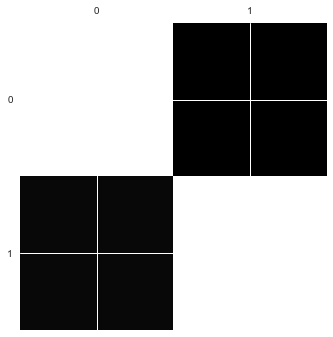

In [84]:
predictions, rf = trainAndPredictRandomForest(xTrainUnderSamp, yTrainUnderSamp, xTestUnderSamp, yTestUnderSamp, 31, 5)
evaluateModel(yTestUnderSamp, predictions) 

Training sizes [1627, 3254, 4881, 6508, 8135, 9762, 11389, 13016, 14643, 16270, 17897, 19524, 21151, 22778, 24405, 26032, 27659, 29286, 30913, 32540]
Mean training scores

 1627    -0.000000
3254    -0.000000
4881    -0.000000
6508    -0.000000
8135    -0.000000
9762    -0.000000
11389   -0.000000
13016   -0.000000
14643   -0.000000
16270   -0.000000
17897   -0.000000
19524   -0.000000
21151    0.067382
22778    0.133980
24405    0.191739
26032    0.242256
27659    0.286829
29286    0.326449
30913    0.360670
32540    0.385292
dtype: float64

 --------------------

Mean validation scores

 1627     0.500000
3254     0.500000
4881     0.500000
6508     0.500000
8135     0.500000
9762     0.500000
11389    0.500000
13016    0.500000
14643    0.500000
16270    0.500000
17897    0.500000
19524    0.500000
21151    0.500000
22778    0.500000
24405    0.500000
26032    0.500000
27659    0.500000
29286    0.500000
30913    0.499047
32540    0.489739
dtype: float64


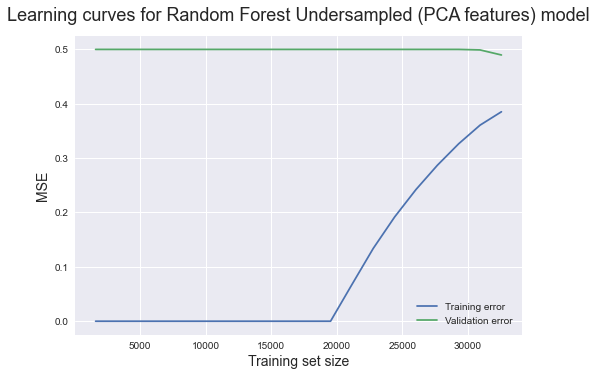

In [85]:
xData, yData = getFeaturesAndLabels(pcaDownSampledData)
model = RandomForestClassifier(n_estimators = 31, max_depth = 5)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Random Forest Undersampled (PCA features)")
plt.show()

##  Oversampling Minority Class

Oversampling is a method of adding duplicates from the minority class to make it equal to the size of the majority class.

Oversampling is usually used when there is not a lot of data to work with. But let's try and see what happens in our dataset.



Important Note:
We should always seperate the original dataset into test and train sets before performing oversampling. This is because the repetition in the data can allow the model to memorize specific data points which can lead to an overfit.

In [86]:
def getTestTrainOversampled(data):    
    # Split the data into features and labels
    feats, labels = getFeaturesAndLabels(data)
    
    #Setting up the test and train data
    trainFeatOverSamp, testFeatOverSamp, trainLabelsOverSamp, testLabelsOverSamp = train_test_split(feats, labels, test_size=0.33, random_state=27)

    # Concatenate the training features and the labels 
    trainData = pd.concat([trainFeatOverSamp, trainLabelsOverSamp], axis = 1)    
    
    # Seperate the majority and the minority classes from the Train Dataset
    trainDefaulters    = trainData[trainData.TARGET == 1] 
    trainNonDefaulters = trainData[trainData.TARGET == 0]
    
    # Upsampling the minority class in the train data
    defaulters_upsampled = resample(trainDefaulters, # the dataset to scales up
                                   replace = True, #resample with replacement
                                    n_samples = len(trainNonDefaulters), #Num of majority class entries
                                    random_state = 27) 
    upsampledData = pd.concat([trainNonDefaulters, defaulters_upsampled]) 

    #Verifying the number of entries for each class
    upsampledData.TARGET.value_counts()

    # Splitting the upsampled train data to features and labels
    trainFeats, trainLabels = getFeaturesAndLabels(upsampledData)
    return trainFeats, testFeatOverSamp, trainLabels, testLabelsOverSamp

###  Oversampling using filtered features
Using the data after peforming the data cleanup

In [87]:
# Getting the undersampled train data and test data
xTrainOverSamp, xTestOverSamp, yTrainOverSamp, yTestOverSamp = getTestTrainOversampled(finalAppData)

#### Logistic Regression
Running logistic regression for oversampled data

Logistic Regression Training time: 2.0521862506866455 seconds
Prediction: 0.5786298751717136
0.5786298751717136 Average Correct
0.5786298751717136 Number for Precision score
0.5786298751717136 Number for Recall Score
0.5786298751717136 Number for F1 score


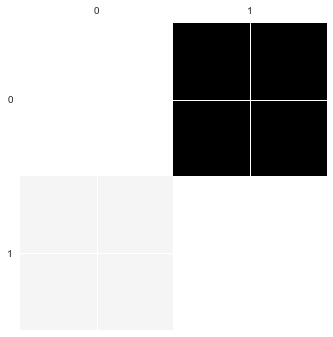

In [88]:
# Training and Predicting Logistic Regression Model
predictions, lr = trainAndPredictLogisticReg(xTrainOverSamp, yTrainOverSamp, xTestOverSamp, yTestOverSamp)
evaluateModel(yTestOverSamp, predictions) 

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077949
20090     0.079423
30135     0.080431
40180     0.081155
50225     0.081274
60270     0.080694
70315     0.081067
80360     0.081376
90405     0.081648
100450    0.081519
110495    0.081906
120540    0.081724
130585    0.081650
140630    0.081735
150675    0.081788
160720    0.081542
170765    0.081537
180810    0.081450
190855    0.081430
200900    0.081353
dtype: float64

 --------------------

Mean validation scores

 10045     0.081050
20090     0.080997
30135     0.081004
40180     0.081014
50225     0.081011
60270     0.081011
70315     0.081011
80360     0.081007
90405     0.081007
100450    0.081007
110495    0.081004
120540    0.081004
130585    0.081004
140630    0.081004
150675    0.081004
160720    0.081004
170765    0.081004
180810    0.081004
190855    0.081001
20090

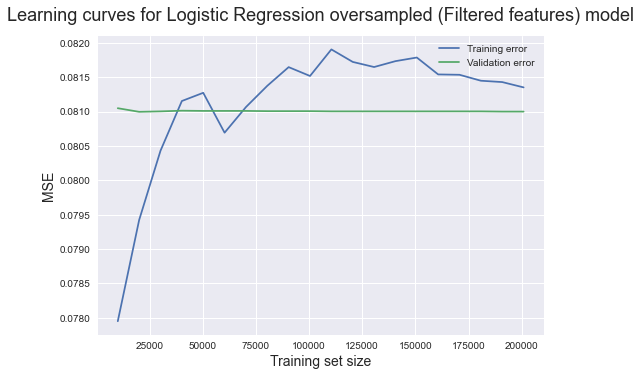

In [89]:
# Plotting the learning curve
xData, yData = getFeaturesAndLabels(finalAppData)
model = LogisticRegression(random_state = 27)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Logistic Regression oversampled (Filtered features)")
plt.show()

#### SVM 
Running SVM for oversampled data

In [ ]:
predictions, lr = trainAndPredictSVM(xTrainOverSamp, yTrainOverSamp, xTestOverSamp, yTestOverSamp)
evaluateModel(yTestOverSamp, predictions)

In [ ]:
# Plotting the learning curve
xData, yData = getFeaturesAndLabels(finalAppData)
model = svm.LinearSVC(C=1, max_iter=1000)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="SVM oversampled (Filtered features)")
plt.show()

#### Random Forest
Running Random forest for oversampled data

RF Training time: 0.6597597599029541 seconds
Prediction: 0.544326982420514
0.544326982420514 Average Correct
0.544326982420514 Number for Precision score
0.544326982420514 Number for Recall Score
0.544326982420514 Number for F1 score


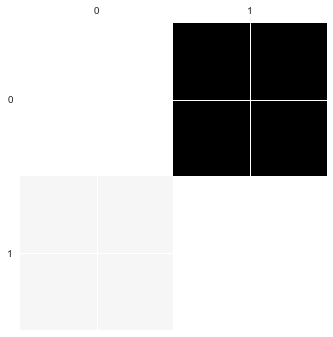

In [90]:
predictions, rf = trainAndPredictRandomForest(xTrainOverSamp, yTrainOverSamp, xTestOverSamp, yTestOverSamp, 7, 3)
evaluateModel(yTestOverSamp, predictions) 

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

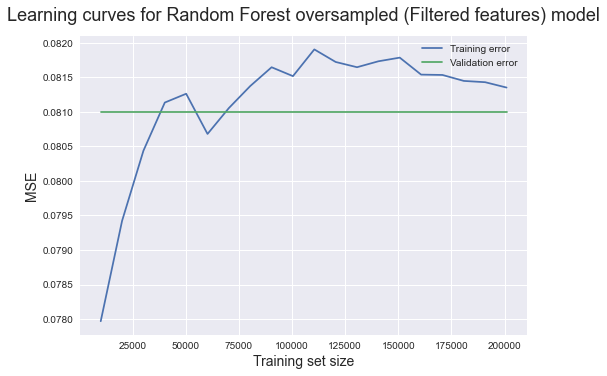

In [91]:
xData, yData = getFeaturesAndLabels(finalAppData)
model = RandomForestClassifier(n_estimators = 7, max_depth = 3)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Random Forest oversampled (Filtered features)")
plt.show()

### Oversampling using important features data
The important data found through Logistic Regression and Random Forest is only used

In [92]:
xTrainOverSamp, xTestOverSamp, yTrainOverSamp, yTestOverSamp = getTestTrainOversampled(importantData)

#### Logistic Regression
Running logistic regression for oversampled data

Logistic Regression Training time: 0.11021852493286133 seconds
Prediction: 0.6486690955424157
0.6486690955424157 Average Correct
0.6486690955424157 Number for Precision score
0.6486690955424157 Number for Recall Score
0.6486690955424157 Number for F1 score


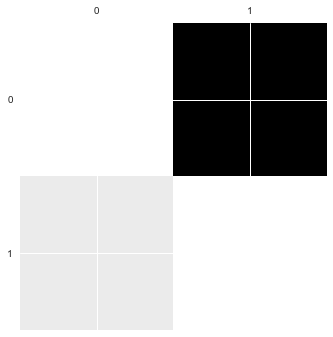

In [93]:
predictions, lr = trainAndPredictLogisticReg(xTrainOverSamp, yTrainOverSamp, xTestOverSamp, yTestOverSamp)
evaluateModel(yTestOverSamp, predictions) 

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

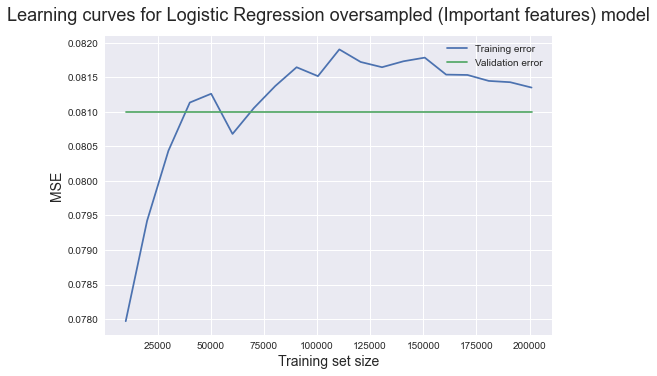

In [94]:
xData, yData = getFeaturesAndLabels(importantData)
model = LogisticRegression(random_state = 27)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Logistic Regression oversampled (Important features)")
plt.show()

#### SVM 
Running SVM for oversampled data

In [ ]:
predictions, lr = trainAndPredictSVM(xTrainOverSamp, yTrainOverSamp, xTestOverSamp, yTestOverSamp)
evaluateModel(yTestOverSamp, predictions)

In [ ]:
#==============================================================================
# Plotting the learning curve
#==============================================================================
xData, yData = getFeaturesAndLabels(importantData)
model = svm.LinearSVC(C=1, max_iter=1000)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="SVM oversampled (Important features)")
plt.show()

#### Random Forest
Running Random forest for oversampled data

RF Training time: 0.07676529884338379 seconds
Prediction: 0.6486690955424157
0.6486690955424157 Average Correct
0.6486690955424157 Number for Precision score
0.6486690955424157 Number for Recall Score
0.6486690955424157 Number for F1 score


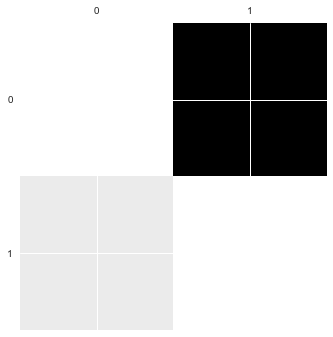

In [95]:
predictions, rf = trainAndPredictRandomForest(xTrainOverSamp, yTrainOverSamp, xTestOverSamp, yTestOverSamp, 1, 1)
evaluateModel(yTestOverSamp, predictions) 

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

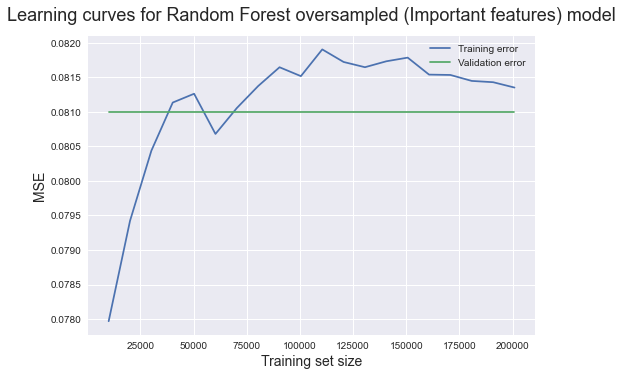

In [96]:
xData, yData = getFeaturesAndLabels(importantData)
model = RandomForestClassifier(n_estimators = 1, max_depth = 1)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Random Forest oversampled (Important features)")
plt.show()

### Oversampling using PCA data
The reduced data after running PCA is used for performing oversampling

In [97]:
# Getting the undersampled train data and test data
xTrainOverSamp, xTestOverSamp, yTrainOverSamp, yTestOverSamp = getTestTrainOversampled(pcaData)

#### Logistic Regression
Running logistic regression for oversampled data

Logistic Regression Training time: 1.8825302124023438 seconds
Prediction: 0.5722391447171953
0.5722391447171953 Average Correct
0.5722391447171953 Number for Precision score
0.5722391447171953 Number for Recall Score
0.5722391447171953 Number for F1 score


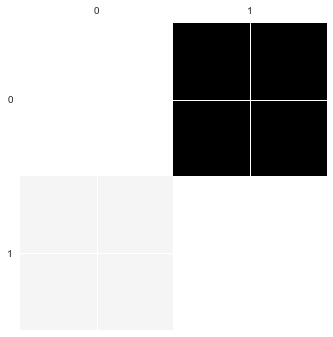

In [98]:
predictions, lr = trainAndPredictLogisticReg(xTrainOverSamp, yTrainOverSamp, xTestOverSamp, yTestOverSamp)
evaluateModel(yTestOverSamp, predictions) 

In [99]:
xData, yData = getFeaturesAndLabels(pcaData)
model = LogisticRegression(random_state = 27)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Logistic Regression oversampled (PCA features)")
plt.show()

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KeyboardInterrupt: 

#### SVM 
Running SVM for oversampled data

In [ ]:
predictions, lr = trainAndPredictSVM(xTrainOverSamp, yTrainOverSamp, xTestOverSamp, yTestOverSamp, 1, 1)
evaluateModel(yTestOverSamp, predictions)

In [ ]:
#==============================================================================
# Plotting the learning curve
#==============================================================================
xData, yData = getFeaturesAndLabels(pcaData)
model = svm.LinearSVC(C=1, max_iter=1000)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="SVM oversampled (PCA features)")
plt.show()

#### Random Forest
Running Random forest for oversampled data

RF Training time: 0.8426051139831543 seconds
Prediction: 0.5487766031575385
0.5487766031575385 Average Correct
0.5487766031575385 Number for Precision score
0.5487766031575385 Number for Recall Score
0.5487766031575385 Number for F1 score


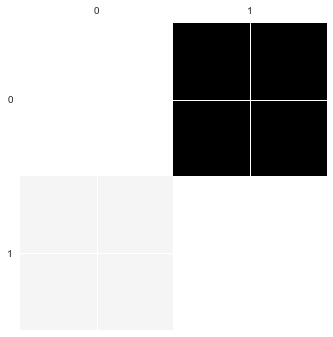

In [100]:
# Training and Predicting Random Forest Model
predictions, rf = trainAndPredictRandomForest(xTrainOverSamp, yTrainOverSamp, xTestOverSamp, yTestOverSamp, 3, 2)
evaluateModel(yTestOverSamp, predictions) 

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081258
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081442
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.081007
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.081011
190855    0.080997
20090

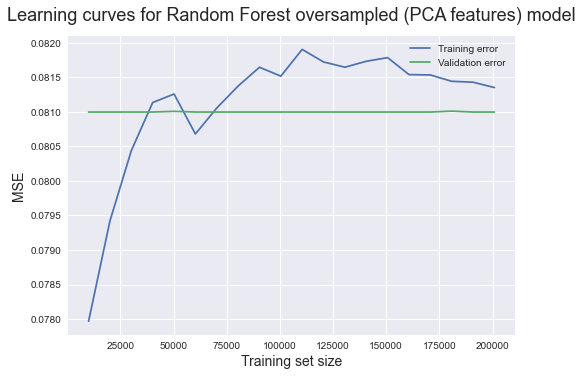

In [101]:
# Plotting the learning curve
xData, yData = getFeaturesAndLabels(pcaData)
model = RandomForestClassifier(n_estimators = 1, max_depth = 1)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Random Forest oversampled (PCA features)")
plt.show()

##  Synthetic Data

SMOTE oversamples the minority class by using nearest neighbours algorithm and generates new synthetic data which is used for model training.

Important note: Similar to data oversampling, the data is splitted into test and training set at the beginning to avoid repetition in the data that can allow the model to memorize specific data points which can lead to an overfit.

In [107]:
def getTestTrainSynthetic(data):
    # Split the data into features and labels
        x, y = getFeaturesAndLabels(data)

    
    # Setting up testing and training sets
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=27)

        sm = SMOTE(random_state=27)
    # Running SMOTE on training set 
    # Upsampling the minority defaulter class by generating new samples# Import Libraries
        X_train, y_train = sm.fit_resample(X_train, y_train)
    
        return X_train, X_test, y_train, y_test

### Generating synthetic data using filtered features
Using the data after peforming the data cleanup

RF Training time: 0.8039045333862305 seconds
Prediction: 0.5091481016942404
0.5091481016942404 Average Correct
0.5091481016942404 Number for Precision score
0.5091481016942404 Number for Recall Score
0.5091481016942404 Number for F1 score


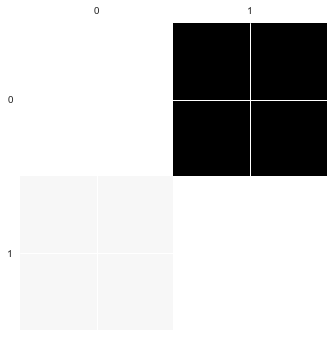

In [108]:
# Training and Predicting Random Forest Model
predictions, rf = trainAndPredictRandomForest(xTrainOverSamp, yTrainOverSamp, xTestOverSamp, yTestOverSamp, 3, 2)
evaluateModel(yTestOverSamp, predictions) 

In [109]:
# Getting the train data and test data after creating synthetic data
xTrainSynthetic, xTestSynthetic, yTrainSynthetic, yTestSynthetic = getTestTrainSynthetic(finalAppData)

#### Logistic Regression
Running logistic regression for synthetic data

Logistic Regression Training time: 2.6666338443756104 seconds
Prediction: 0.6870831591311792
0.6870831591311792 Average Correct
0.6870831591311792 Number for Precision score
0.6870831591311792 Number for Recall Score
0.6870831591311792 Number for F1 score


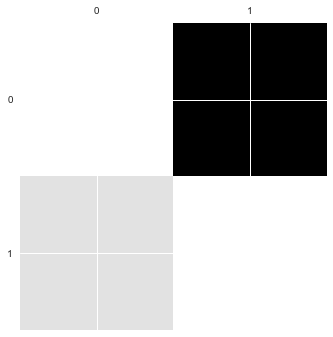

In [110]:
# Training and Predicting Logistic Regression Model
predictions, lr = trainAndPredictLogisticReg(xTrainSynthetic, yTrainSynthetic, xTestSynthetic, yTestSynthetic)
evaluateModel(yTestSynthetic, predictions)

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077949
20090     0.079423
30135     0.080431
40180     0.081155
50225     0.081274
60270     0.080694
70315     0.081067
80360     0.081376
90405     0.081648
100450    0.081519
110495    0.081906
120540    0.081724
130585    0.081650
140630    0.081735
150675    0.081788
160720    0.081542
170765    0.081537
180810    0.081450
190855    0.081430
200900    0.081353
dtype: float64

 --------------------

Mean validation scores

 10045     0.081050
20090     0.080997
30135     0.081004
40180     0.081014
50225     0.081011
60270     0.081011
70315     0.081011
80360     0.081007
90405     0.081007
100450    0.081007
110495    0.081004
120540    0.081004
130585    0.081004
140630    0.081004
150675    0.081004
160720    0.081004
170765    0.081004
180810    0.081004
190855    0.081001
20090

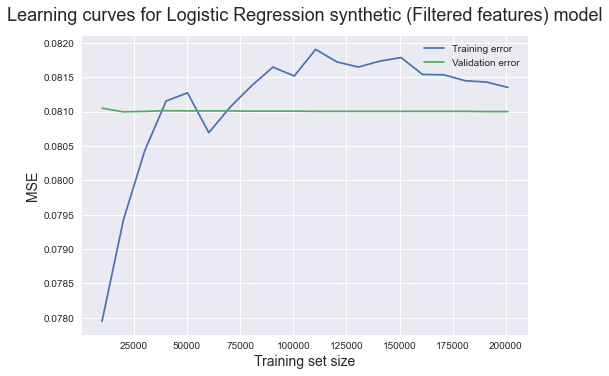

In [111]:
# Plotting the learning curve
xData, yData = getFeaturesAndLabels(finalAppData)
model = LogisticRegression(random_state = 27)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Logistic Regression synthetic (Filtered features)")
plt.show()

#### SVM 
Running SVM for synthetic data

In [ ]:
predictions, lr = trainAndPredictSVM(xTrainSynthetic, yTrainSynthetic, xTestSynthetic, yTestSynthetic)
evaluateModel(yTestSynthetic, predictions)

In [ ]:
# Plotting the learning curve
xData, yData = getFeaturesAndLabels(finalAppData)
model = svm.LinearSVC(C=1, max_iter=1000)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="SVM synthetic (Filtered features)")
plt.show()

#### Random Forest
Running Random forest for synthetic data

RF Training time: 1.4770166873931885 seconds
Prediction: 0.5649923351052181
0.5649923351052181 Average Correct
0.5649923351052181 Number for Precision score
0.5649923351052181 Number for Recall Score
0.5649923351052181 Number for F1 score


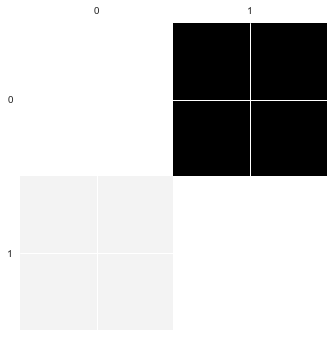

In [112]:
# Training and Predicting Random Forest Model
predictions, rf = trainAndPredictRandomForest(xTrainSynthetic, yTrainSynthetic, xTestSynthetic, yTestSynthetic, 7, 3)
evaluateModel(yTestSynthetic, predictions) 

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081447
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.081001
190855    0.080997
20090

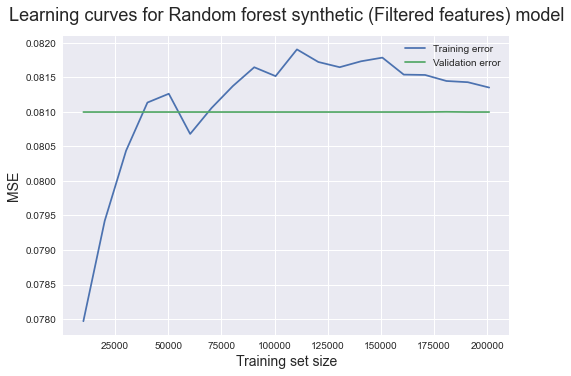

In [113]:
# Plotting the learning curve
xData, yData = getFeaturesAndLabels(finalAppData)
model = RandomForestClassifier(n_estimators = 3, max_depth = 2)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Random forest synthetic (Filtered features)")
plt.show()

### Generating synthetic data using important features data
The important data found through Logistic Regression and Random Forest is only used

In [114]:
# Getting the train data and test data after creating synthetic data
xTrainSynthetic, xTestSynthetic, yTrainSynthetic, yTestSynthetic = getTestTrainSynthetic(importantData)

#### Logistic Regression
Running logistic regression for synthetic data

Logistic Regression Training time: 0.1914684772491455 seconds
Prediction: 0.6486690955424157
0.6486690955424157 Average Correct
0.6486690955424157 Number for Precision score
0.6486690955424157 Number for Recall Score
0.6486690955424157 Number for F1 score


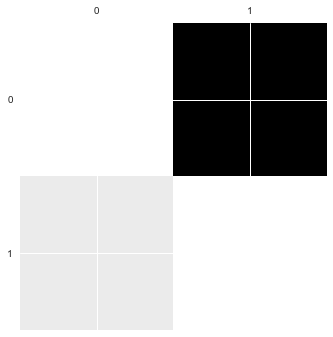

In [115]:
# Training and Predicting Logistic Regression Model
predictions, lr = trainAndPredictLogisticReg(xTrainSynthetic, yTrainSynthetic, xTestSynthetic, yTestSynthetic)
evaluateModel(yTestSynthetic, predictions)

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

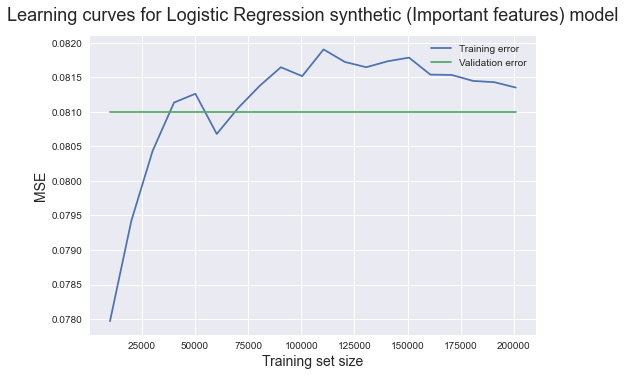

In [116]:
# Plotting the learning curve
xData, yData = getFeaturesAndLabels(importantData)
model = LogisticRegression(random_state = 27)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Logistic Regression synthetic (Important features)")
plt.show()

#### SVM 
Running SVM for synthetic data

In [ ]:
predictions, lr = trainAndPredictSVM(xTrainSynthetic, yTrainSynthetic, xTestSynthetic, yTestSynthetic)
evaluateModel(yTestSynthetic, predictions)

In [ ]:
#==============================================================================
# Plotting the learning curve
#==============================================================================
xData, yData = getFeaturesAndLabels(importantData)
model = svm.LinearSVC(C=1, max_iter=1000)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="SVM synthetic (Important features)")
plt.show()

#### Random Forest
Running Random forest for synthetic data

RF Training time: 0.09811043739318848 seconds
Prediction: 0.6486690955424157
0.6486690955424157 Average Correct
0.6486690955424157 Number for Precision score
0.6486690955424157 Number for Recall Score
0.6486690955424157 Number for F1 score


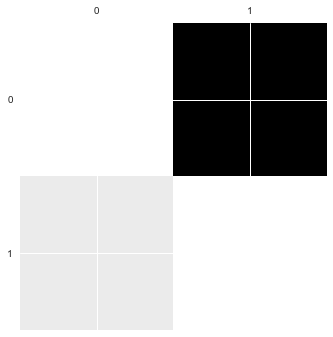

In [117]:
# Training and Predicting Random Forest Model
predictions, rf = trainAndPredictRandomForest(xTrainSynthetic, yTrainSynthetic, xTestSynthetic, yTestSynthetic, 1, 1)
evaluateModel(yTestSynthetic, predictions) 

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077969
20090     0.079423
30135     0.080438
40180     0.081135
50225     0.081262
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081534
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.080997
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

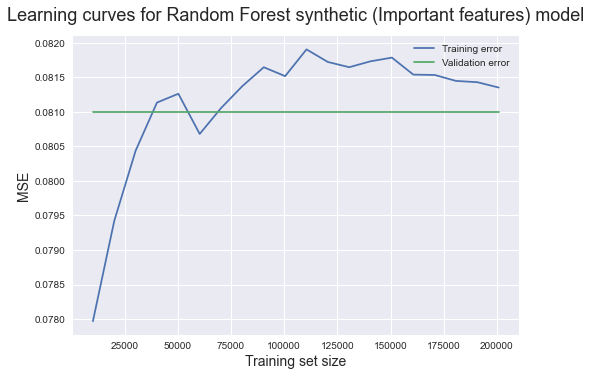

In [118]:
# Plotting the learning curve
xData, yData = getFeaturesAndLabels(importantData)
model = RandomForestClassifier(n_estimators = 1, max_depth = 1)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Random Forest synthetic (Important features)")
plt.show()

### Generating synthetic data using PCA data
The reduced data after running PCA is used for generation of synthetic data

In [119]:
# Getting the train data and test data after creating synthetic data
xTrainSynthetic, xTestSynthetic, yTrainSynthetic, yTestSynthetic = getTestTrainSynthetic(pcaData)

#### Logistic Regression
Running logistic regression for synthetic data

Logistic Regression Training time: 5.453418970108032 seconds
Prediction: 0.5713034302892751
0.5713034302892751 Average Correct
0.5713034302892751 Number for Precision score
0.5713034302892751 Number for Recall Score
0.5713034302892751 Number for F1 score


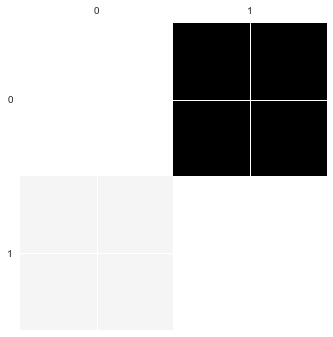

In [120]:
predictions, lr = trainAndPredictLogisticReg(xTrainSynthetic, yTrainSynthetic, xTestSynthetic, yTestSynthetic)
evaluateModel(yTestSynthetic, predictions)

In [121]:
xData, yData = getFeaturesAndLabels(pcaData)
model = LogisticRegression(random_state = 27)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Logistic Regression synthetic (PCA features)")
plt.show()

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

KeyboardInterrupt: 

#### SVM 
Running SVM for synthetic data

In [ ]:
predictions, lr = trainAndPredictSVM(xTrainSynthetic, yTrainSynthetic, xTestSynthetic, yTestSynthetic)
evaluateModel(yTestSynthetic, predictions)

In [ ]:
#==============================================================================
# Plotting the learning curve
#==============================================================================
xData, yData = getFeaturesAndLabels(pcaData)
model = svm.LinearSVC(C=1, max_iter=1000)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="SVM synthetic (PCA features)")
plt.show()

#### Random Forest
Running Random forest for synthetic data

RF Training time: 22.88536500930786 seconds
Prediction: 0.5678492504330168
0.5678492504330168 Average Correct
0.5678492504330168 Number for Precision score
0.5678492504330168 Number for Recall Score
0.5678492504330168 Number for F1 score


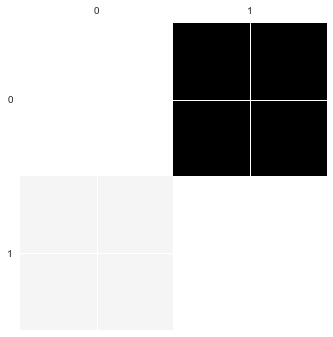

In [122]:
predictions, rf = trainAndPredictRandomForest(xTrainSynthetic, yTrainSynthetic, xTestSynthetic, yTestSynthetic, 15, 4)
evaluateModel(yTestSynthetic, predictions) 

Training sizes [10045, 20090, 30135, 40180, 50225, 60270, 70315, 80360, 90405, 100450, 110495, 120540, 130585, 140630, 150675, 160720, 170765, 180810, 190855, 200900]
Mean training scores

 10045     0.077949
20090     0.079423
30135     0.080425
40180     0.081135
50225     0.081258
60270     0.080680
70315     0.081055
80360     0.081374
90405     0.081646
100450    0.081517
110495    0.081904
120540    0.081722
130585    0.081646
140630    0.081732
150675    0.081785
160720    0.081539
170765    0.081533
180810    0.081448
190855    0.081429
200900    0.081352
dtype: float64

 --------------------

Mean validation scores

 10045     0.081020
20090     0.080997
30135     0.080997
40180     0.080997
50225     0.080997
60270     0.080997
70315     0.080997
80360     0.080997
90405     0.080997
100450    0.080997
110495    0.080997
120540    0.080997
130585    0.080997
140630    0.080997
150675    0.080997
160720    0.080997
170765    0.080997
180810    0.080997
190855    0.080997
20090

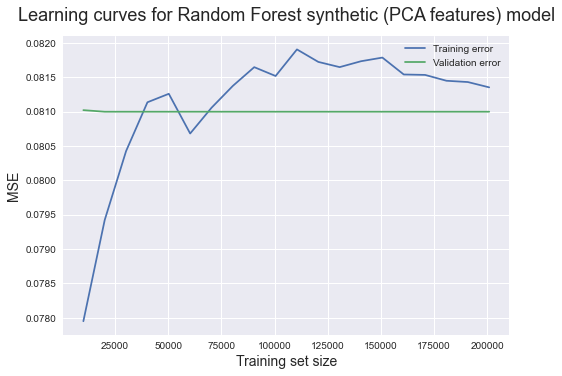

In [123]:
xData, yData = getFeaturesAndLabels(pcaData)
model = RandomForestClassifier(n_estimators = 15, max_depth = 4)
draw_learning_curve(model=model, x=xData, labels=yData, cv=5, numTrainSizes=20, modelName="Random Forest synthetic (PCA features)")
plt.show()